# 1. Iniciando o diálogo

Seja bem-vindo ao primeiro projeto de Aprendizado de Máquina com aplicação prática na agricultura amazônica! 🌱

Neste notebook, vamos trabalhar com dados reais sobre a produtividade do guaraná, relacionando fatores climáticos, sazonais e fenômenos como o El Niño (ENSO).  
Nosso objetivo é prever a produtividade das safras e classificá-las como **baixa**, **média** ou **alta**, utilizando técnicas de **Aprendizado Supervisionado** e, ao final, um toque de **Aprendizado por Reforço**.

---

## 📦 Etapas iniciais

Antes de começar qualquer análise ou modelagem, precisamos preparar o ambiente de trabalho.  
Nesta etapa inicial, vamos:

- Importar as bibliotecas essenciais para análise de dados e visualização;
- Conectar ao ambiente de arquivos (como o Google Drive, se necessário);
- Garantir que as ferramentas estão prontas para uso ao longo do notebook.

In [3]:
# Etapa 1 — Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Entendendo o problema

Agora que configuramos o ambiente, é hora de mergulhar no problema que queremos resolver.

Neste projeto, vamos trabalhar com um **conjunto de dados reais** sobre a produção agrícola de guaraná no Amazonas, contendo informações sobre:

- Fatores climáticos anuais (chuva, temperatura, umidade)
- Fases do cultivo (floração e colheita)
- Classificação das safras (baixa, média ou alta produtividade)
- Eventos sazonais como o El Niño (ENSO)

---

### 🧭 O que vamos investigar?

Nosso objetivo é usar esses dados para construir modelos capazes de:

1. **Prever a produtividade da safra** (tarefa de regressão)
2. **Classificar a safra como baixa, média ou alta** (tarefa de classificação)

Antes de aplicar modelos, precisamos entender bem:

- As variáveis disponíveis
- As relações entre elas
- A motivação por trás dessas previsões

Essa compreensão começa nos próximos blocos.

## 2.1 🌾 A importância da previsão da produtividade

A previsão da produtividade agrícola é uma ferramenta estratégica para o planejamento da produção, logística e comercialização de culturas como o guaraná, especialmente em regiões como o Amazonas.

Compreender como fatores climáticos afetam a produtividade ajuda:

- Agricultores a **tomar decisões melhores** sobre irrigação, adubação e colheita
- Gestores públicos e cooperativas a se prepararem para **flutuações na oferta**
- Pesquisadores e técnicos a identificar **relações complexas** entre clima e solo

---

### 📍 O caso do guaraná

O guaraná é uma cultura importante da região Norte do Brasil. Sua produção é altamente sensível a:

- Chuvas durante a floração e colheita
- Temperaturas médias no ciclo produtivo
- Eventos climáticos como o **El Niño** (ENSO), que altera padrões de chuva e temperatura

Prever a produtividade com base em dados históricos é uma forma poderosa de aplicar ciência de dados à realidade local.

---

Neste projeto, vamos usar dados históricos com informações anuais de clima e produção de guaraná para desenvolver modelos que aprendem **a prever e classificar a produtividade da safra**.

## 2.2 Variáveis do dataset e suas relações

Vamos agora carregar o conjunto de dados com as informações climáticas e de produtividade do guaraná.  
Esses dados serão a base para todas as etapas de análise e modelagem ao longo do projeto.

In [7]:
# 📥 Carregamento inicial do dataset
df = pd.read_csv("dataset_produtividade_guarana.csv", sep=';', decimal=',')
df.head()

ano  chuva_durante_floração_mm  chuva_durante_colheita_mm  \
0  1984                      423.2                      516.7   
1  1985                      363.0                      540.0   
2  1986                      320.6                      666.9   
3  1987                      360.0                      180.4   
4  1988                      419.4                      693.8   

   chuva_total_anual_mm  anomalia_chuva_floração_mm  \
0                2459.8                        93.4   
1                2773.6                        33.2   
2                2694.5                        -9.2   
3                2165.2                        30.2   
4                2932.8                        89.6   

   temperatura_média_floração_C  umidade_relativa_média_floração_%  \
0                         26.16                              84.25   
1                         25.78                              84.09   
2                         25.46                              84.24   
3                         26.91                              86.56   
4                         27.80                              85.59   

  evento_ENSO  produtividade_kg_por_ha produtividade_safra  
0      Neutro                      110               media  
1      Neutro                      107               media  
2     El Niño                      109               media  
3     El Niño                       74               baixa  
4     La Niña                      102               media

### 🔤 Renomeando as colunas

Algumas colunas do dataset original possuem nomes longos.  
Vamos renomeá-las para facilitar a leitura e o uso nos gráficos e modelos.

In [9]:
#Renomeação das colunas do dataset do csv para variáveis mais simples
df.rename(columns={
    'chuva_durante_floração_mm': 'chuva_flor',
    'chuva_durante_colheita_mm': 'chuva_colheita',
    'chuva_total_anual_mm': 'chuva_total',
    'anomalia_chuva_floração_mm': 'anomalia_flor',
    'temperatura_média_floração_C': 'temp_flor',
    'umidade_relativa_média_floração_%': 'umid_flor',
    'evento_ENSO': 'ENSO',
    'produtividade_kg_por_ha': 'produtividade',
    'produtividade_safra': 'safra'
}, inplace=True)

### 🔧 Ajustes adicionais

- A variável de umidade estava expressa em porcentagem. Vamos convertê-la para escala fracionária (ex: 80% → 0.80).
- Também definimos o ano como índice da tabela, pois ele será útil para análises temporais.

In [11]:
df['umid_flor'] = df['umid_flor'] / 100 #instancia uma coluna e atribui a coluna dividida por 100 para padronização de números
df.set_index('ano', inplace=True) #seta o ano como index ao invés do id
df.head() #mostra os 5 primeiros valores

chuva_flor  chuva_colheita  chuva_total  anomalia_flor  temp_flor  \
ano                                                                       
1984       423.2           516.7       2459.8           93.4      26.16   
1985       363.0           540.0       2773.6           33.2      25.78   
1986       320.6           666.9       2694.5           -9.2      25.46   
1987       360.0           180.4       2165.2           30.2      26.91   
1988       419.4           693.8       2932.8           89.6      27.80   

      umid_flor     ENSO  produtividade  safra  
ano                                             
1984     0.8425   Neutro            110  media  
1985     0.8409   Neutro            107  media  
1986     0.8424  El Niño            109  media  
1987     0.8656  El Niño             74  baixa  
1988     0.8559  La Niña            102  media

## 2.3 🎯 Tarefas de aprendizado supervisionado e objetivos do projeto

Com o dataset carregado e compreendido, podemos agora definir as **duas tarefas principais** que resolveremos ao longo deste projeto.

---

### 📈 1. Regressão — Prever a produtividade

Nesta tarefa, o objetivo será construir um modelo que receba como entrada variáveis climáticas e sazonais, e gere como saída a **produtividade estimada em kg/ha**.

Isso nos permite prever a produtividade com base em cenários climáticos futuros, auxiliando o planejamento agrícola.

---

### 🧮 2. Classificação — Categorizar a safra

Nesta tarefa, vamos transformar a produtividade em **categorias discretas**:

- `baixa`
- `média`
- `alta`

O modelo de classificação tentará **prever o rótulo da safra**, o que é útil para:

- Diagnósticos rápidos
- Alertas sazonais
- Análises qualitativas

---

### 🚀 Objetivo final

Ao longo do projeto, vamos construir modelos supervisionados para essas duas tarefas, avaliar seus desempenhos e visualizar seus comportamentos.

Além disso, encerraremos com um **desafio opcional de Aprendizagem por Reforço**, que explora decisões sequenciais aplicadas à irrigação.

Agora que o problema está compreendido, vamos explorar os dados!

# 3. Análise Exploratória dos Dados (EDA)

Antes de treinar qualquer modelo, é fundamental entender o comportamento dos dados.  
A **Análise Exploratória de Dados (EDA)** nos ajuda a:

- Visualizar a distribuição das variáveis
- Detectar padrões, tendências e possíveis outliers
- Investigar relações entre clima e produtividade
- Identificar quais fatores parecem mais influentes

---

Nesta etapa, vamos construir diversos gráficos, como:

- Dispersão entre variáveis climáticas e produtividade
- Boxplots comparando categorias (ex: ENSO)
- Histogramas para entender a distribuição dos dados
- Correlação entre variáveis
- Componentes principais (PCA) para redução de dimensionalidade

Esses gráficos serão essenciais para formular hipóteses e escolher abordagens adequadas de modelagem.

## 3.1 Diagnóstico inicial do dataset

## 3.1 Diagnóstico inicial do dataset

Vamos começar explorando a estrutura geral do conjunto de dados.  
Nesta etapa inicial, buscamos responder perguntas como:

- Quantas observações existem?
- Quais são os tipos de variáveis?
- Há dados ausentes?
- Como se comportam os valores mínimos, máximos e médios?

Para isso, utilizamos os métodos `.info()`, `.isnull()` e `.describe()`, que nos fornecem um panorama estatístico e estrutural do dataframe.


In [13]:
# Ver informações gerais do dataframe
df.info()

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Resumo estatístico
df.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 1984 to 2023
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   chuva_flor      40 non-null     float64
 1   chuva_colheita  40 non-null     float64
 2   chuva_total     40 non-null     float64
 3   anomalia_flor   40 non-null     float64
 4   temp_flor       40 non-null     float64
 5   umid_flor       40 non-null     float64
 6   ENSO            40 non-null     object 
 7   produtividade   40 non-null     int64  
 8   safra           40 non-null     object 
dtypes: float64(6), int64(1), object(2)
memory usage: 3.1+ KB

Valores ausentes por coluna:
chuva_flor        0
chuva_colheita    0
chuva_total       0
anomalia_flor     0
temp_flor         0
umid_flor         0
ENSO              0
produtividade     0
safra             0
dtype: int64


count         mean         std        min          25%  \
chuva_flor       40.0   350.110000  103.369868   132.6000   282.900000   
chuva_colheita   40.0   467.175000  177.934808    39.7000   363.650000   
chuva_total      40.0  2532.797500  382.051048  1889.4000  2243.575000   
anomalia_flor    40.0    20.310000  103.369868  -197.2000   -46.900000   
temp_flor        40.0    27.313000    0.949186    24.8300    26.895000   
umid_flor        40.0     0.820178    0.037551     0.7468     0.787375   
produtividade    40.0   137.300000   70.966298    50.0000    98.750000   

                      50%         75%        max  
chuva_flor       360.9000   420.35000   657.5000  
chuva_colheita   489.3500   580.25000   756.9000  
chuva_total     2469.4500  2826.85000  3432.9000  
anomalia_flor     31.1000    90.55000   327.7000  
temp_flor         27.5050    27.91000    28.6300  
umid_flor          0.8289     0.85285     0.8787  
produtividade    123.0000   157.75000   399.0000

## 3.2 📊 Gráficos exploratórios

Agora que conhecemos a estrutura geral dos dados, vamos usar visualizações para entender melhor o comportamento das variáveis.

A análise gráfica permite:

- Detectar padrões e tendências
- Comparar produtividades em diferentes condições climáticas
- Verificar a distribuição dos dados
- Explorar relações entre variáveis contínuas e categóricas

Nos próximos blocos, você verá:

- Comparações de produtividade entre eventos ENSO
- Dispersão entre temperatura e produtividade
- Distribuições e correlações das variáveis climáticas

### 3.2.1 Boxplot: ENSO × Produtividade

O fenômeno climático El Niño–Oscilação Sul (ENSO) afeta padrões de chuva e temperatura.  
Neste gráfico, comparamos a produtividade agrícola em anos classificados como `El Niño`, `La Niña` ou `Neutro`.

O boxplot nos ajuda a observar:

- Tendências de produtividade por evento
- Variação dentro de cada grupo
- Presença de possíveis outliers

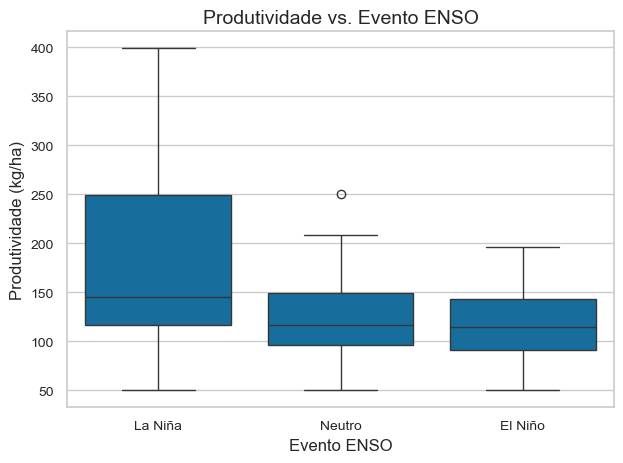

In [19]:
"""versão inicial
sns.boxplot(data=df, x='ENSO', y='produtividade')"""

"""versão refinada sugerida"""
sns.set(style="whitegrid", palette="colorblind")#estiliza a coloração do gráfico
sns.boxplot(
    data=df,#o metódo define a coluna, data recebe df(coluna) x e y
    x='ENSO', #eixo x recebe a coluna renoameada 'ENSO'
    y='produtividade', #eixo y recebe a coluna renomeada 'produtividade'
    order=['La Niña', 'Neutro', 'El Niño'] #ordem de plotagem, essa ordem irá coincidir com a comparação com o outro eixo
)
#configuração do gráfico, título, legenda lateral(y), legenda inferior(x) e tamanho de  fontes
plt.title('Produtividade vs. Evento ENSO', fontsize=14)
plt.xlabel('Evento ENSO', fontsize=12)
plt.ylabel('Produtividade (kg/ha)', fontsize=12)
plt.xticks(fontsize=10) #define o tamanho da numeração de plotagem
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show() #plota o gráfico

### 3.2.2 Scatter: Temperatura × Produtividade

Aqui, exploramos a relação entre a temperatura média durante a floração e a produtividade da safra.

Cada ponto representa um ano, e a cor indica o tipo de evento ENSO.  
Com esse gráfico, buscamos identificar padrões visuais que indiquem:

- Faixas ideais de temperatura
- Efeitos do ENSO sobre a produtividade

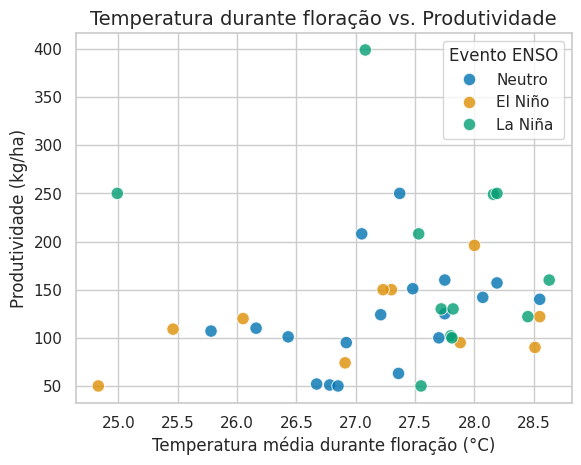

In [ ]:
#define o dataset, define a plotagem de valores do gráfico, eixo x recebe a temperatura durante a floração, eixo y recebe a produtividade, 
#coincidentes com os valores do dataset do evento-enso
sns.scatterplot(data=df, x='temp_flor', y='produtividade', \
                hue='ENSO', s=80, alpha=0.8)

plt.title('Temperatura durante floração vs. Produtividade', fontsize=14)
plt.xlabel('Temperatura média durante floração (°C)', fontsize=12)
plt.ylabel('Produtividade (kg/ha)', fontsize=12)
plt.legend(title='Evento ENSO')

### 3.2.3 Histogramas de variáveis numéricas

Este conjunto de histogramas mostra a distribuição das variáveis numéricas do dataset.

Podemos observar:

- Se há assimetrias ou concentrações
- Valores extremos (outliers)
- Faixas mais frequentes para temperatura, umidade, chuva e produtividade


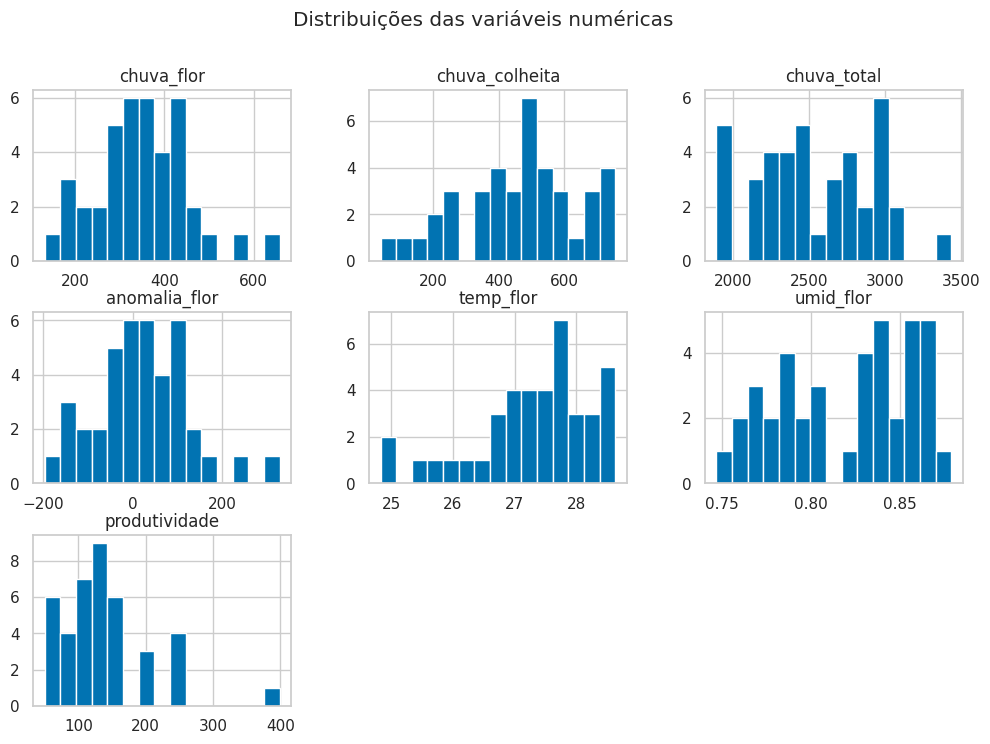

In [ ]:
#selciona dentro do dataset as faixas frequentes numéricas, incluídas na classificação de números
df.select_dtypes(include='number').hist(bins=15, figsize=(12,8))
plt.suptitle("Distribuições das variáveis numéricas") #título
plt.show() #plota o gráfico

### 3.2.4 Heatmap de Correlação

### 3.2.4 Heatmap de Correlação

Aqui, analisamos a **correlação entre variáveis numéricas**.

O mapa de calor (heatmap) destaca:

- Relações fortes (positivas ou negativas)
- Variáveis redundantes (alta correlação entre si)
- Fatores que podem influenciar diretamente a produtividade

Isso nos ajuda a selecionar variáveis relevantes e evitar multicolinearidade.

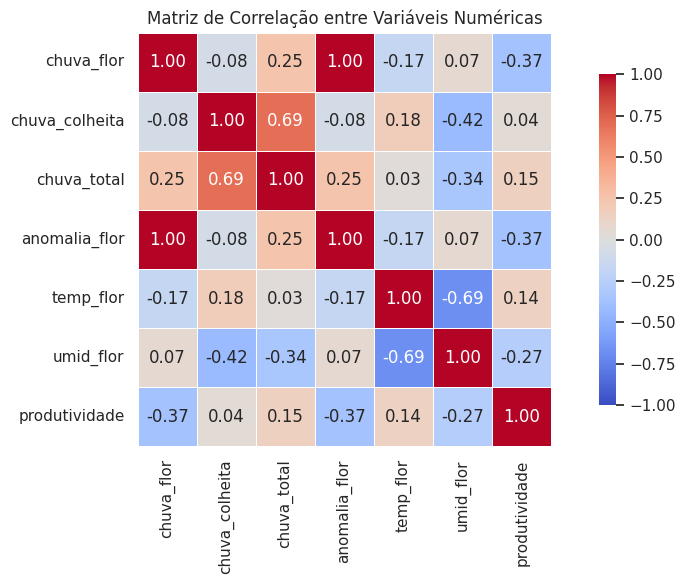

In [ ]:
# Seleciona só as colunas numéricas relevantes
variaveis_numericas = df.select_dtypes(include='number')

# Calcula a matriz de correlação
correlacao = variaveis_numericas.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlacao,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .8},
    vmin=-1, vmax=1
)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

### 3.2.5 Pairplot

### 3.2.5 Pairplot

Este gráfico combina múltiplas dispersões e histogramas em uma só visualização.

O objetivo é:

- Visualizar pares de variáveis simultaneamente
- Ver como a produtividade se distribui em relação a cada uma delas
- Observar agrupamentos visuais por tipo de safra (baixa, média, alta)

Essa visão é útil antes de aplicar técnicas como PCA ou regressão.

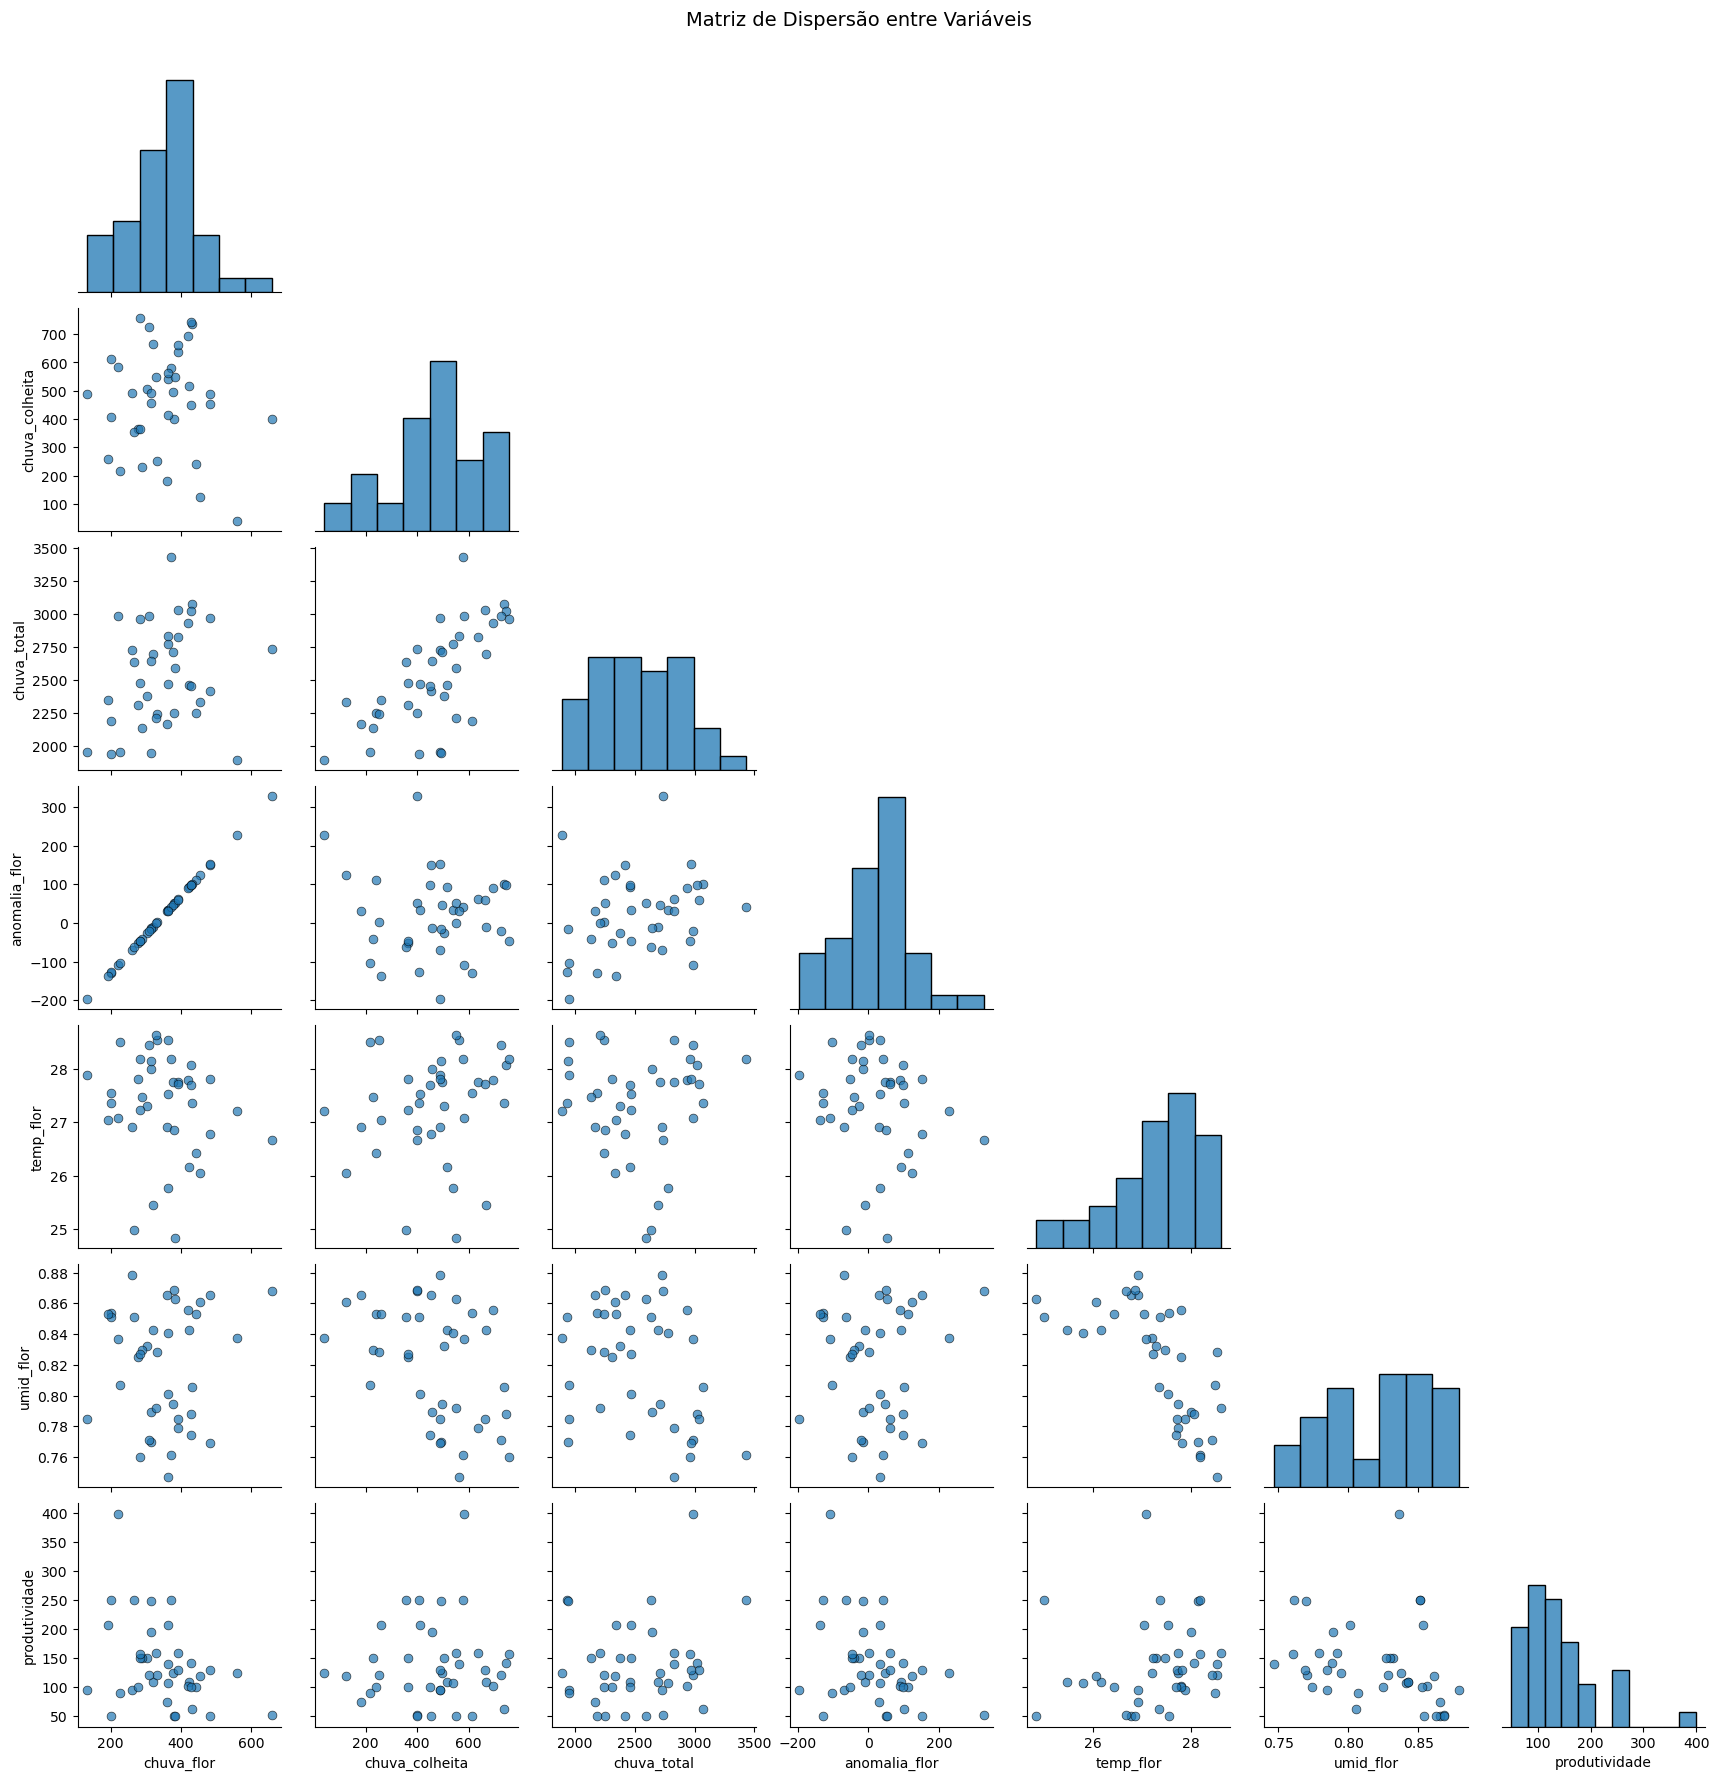

'versão refinada sugerida'

In [15]:
# Seleciona as variáveis numéricas (sem o ano)
cols_plot = ['chuva_flor', 'chuva_colheita', 'chuva_total',
             'anomalia_flor', 'temp_flor', 'umid_flor', 'produtividade']

"""versão inicial"""
# Pairplot
sns.pairplot(
    df[cols_plot], 
    corner=True,       # evita duplicação acima/abaixo da diagonal
    diag_kind='hist',  # ou 'kde'
    plot_kws={'alpha': 0.7, 's': 40, 'edgecolor': 'k'}
)
plt.suptitle("Matriz de Dispersão entre Variáveis", fontsize=14, y=1.02)
plt.show()

"""versão refinada sugerida"""
# # Pairplot
#sns.pairplot(
#     df[cols_plot + ['ENSO']],
#     hue='ENSO',
#     corner=True,
#     diag_kind='hist',
#     plot_kws={'s': 30, 'alpha': 0.7, 'edgecolor': 'k'}
# )
#plt.suptitle("Matriz de Dispersão entre Variáveis (por ENSO)", fontsize=16, y=1.03)
#plt.show()

# 4. Engenharia de Atributos

Após explorar visualmente os dados, é hora de **preparar as variáveis para os modelos de Machine Learning**.

Essa preparação é chamada de **engenharia de atributos** e envolve:

- Transformações
- Criação de variáveis novas
- Codificações necessárias
- Representações numéricas para variáveis categóricas

Nosso objetivo é fornecer aos modelos entradas mais informativas e organizadas, sem perder a interpretação original das variáveis.

Nesta seção, vamos:

- Criar uma variável de **chuva relativa**
- Codificar o evento ENSO em variáveis binárias
- Transformar a variável-alvo da classificação (safra) em valores numéricos

## 4.1 Criação de variáveis sazonais e climáticas

A variável `chuva_relativa` representa a fração da chuva total anual que ocorreu durante a floração.  
Essa relação pode ser mais informativa do que usar os valores absolutos separadamente.

In [ ]:
# 1. Chuva relativa durante floração
# a chuva relativa é o resultado da divisão da chuva durante a floração e a chuva total
df['chuva_relativa'] = df['chuva_flor'] / df['chuva_total']

# 2. Binário: anomalia positiva ou não
df['anomalia_bin'] = (df['anomalia_flor'] > 0).astype(int)

## 4.2 Codificação de variáveis categóricas (ENSO)

A variável `ENSO` representa o tipo de evento climático do ano (`Neutro`, `El Niño`, `La Niña`).  
Modelos de machine learning exigem que variáveis categóricas sejam convertidas em números.  
Aqui, usamos a técnica de **codificação one-hot (dummies)** para gerar colunas binárias: `ENSO_La Niña` e `ENSO_Neutro`.

In [ ]:
# 3. Codificar ENSO como variáveis dummies // transforma os valores em falso e verdadeiro(colunas binárias)
df = pd.get_dummies(df, columns=['ENSO'], drop_first=True)  # cria ENSO_El Niño e ENSO_La Niña

df.head(10)

chuva_flor  chuva_colheita  chuva_total  anomalia_flor  temp_flor  \
ano                                                                       
1984       423.2           516.7       2459.8           93.4      26.16   
1985       363.0           540.0       2773.6           33.2      25.78   
1986       320.6           666.9       2694.5           -9.2      25.46   
1987       360.0           180.4       2165.2           30.2      26.91   
1988       419.4           693.8       2932.8           89.6      27.80   
1989       480.9           454.1       2416.7          151.1      26.78   
1990       657.5           399.6       2732.2          327.7      26.67   
1991       454.5           125.3       2332.2          124.7      26.05   
1992       557.5            39.7       1889.4          227.7      27.21   
1993       380.3           401.2       2250.9           50.5      26.85   

      umid_flor  produtividade  safra  chuva_relativa  anomalia_bin  \
ano                                                                   
1984     0.8425            110  media        0.172047             1   
1985     0.8409            107  media        0.130877             1   
1986     0.8424            109  media        0.118983             0   
1987     0.8656             74  baixa        0.166266             1   
1988     0.8559            102  media        0.143003             1   
1989     0.8653             51  baixa        0.198990             1   
1990     0.8680             52  baixa        0.240649             1   
1991     0.8610            120  media        0.194880             1   
1992     0.8373            124   alta        0.295067             1   
1993     0.8684             50  baixa        0.168955             1   

      ENSO_La Niña  ENSO_Neutro  
ano                              
1984         False         True  
1985         False         True  
1986         False        False  
1987         False        False  
1988          True        False  
1989         False         True  
1990         False         True  
1991         False        False  
1992         False         True  
1993         False         True

In [ ]:
df.filter(like='ENSO').tail(10) #filtra os valores da coluna com o prefixo "ENSO"

ENSO_La Niña  ENSO_Neutro
ano                            
2014         False         True
2015         False        False
2016          True        False
2017         False         True
2018         False         True
2019         False         True
2020          True        False
2021          True        False
2022          True        False
2023         False        False

# 5. Preparação para o modelo

Com os atributos prontos, vamos agora preparar os dados para treinar os modelos de Machine Learning.

Essa etapa envolve:

- Selecionar as variáveis preditoras e a variável-alvo
- Separar variáveis numéricas e binárias
- Padronizar os dados numéricos
- Dividir os dados em treino e teste de forma coerente

O objetivo é garantir que os modelos recebam os dados em um formato ideal e que possamos avaliar o desempenho com justiça.

## 5.1 Seleção de variáveis

Selecionamos aqui:

- A variável-alvo para regressão (`produtividade`)
- As variáveis preditoras (`X`), removendo as colunas `safra` (usada na tarefa de classificação) e `produtividade` (alvo)

Essa seleção será usada nos modelos de regressão linear com e sem PCA.

In [ ]:
# 1. Definindo X e y
X = df.drop(columns=['produtividade', 'safra'])  # safra é para classificação
y = df['produtividade']

## 5.2 Identificação dos tipos de variáveis

In [ ]:
# 2. Lista de colunas numéricas e binárias
colunas_numericas = ['chuva_flor', 'chuva_colheita', 'chuva_total', 'anomalia_flor',
                     'temp_flor', 'umid_flor', 'chuva_relativa']
colunas_binarias = ['anomalia_bin', 'ENSO_La Niña', 'ENSO_Neutro']

## 5.3 Padronização com ColumnTransformer

Usamos o `StandardScaler` para padronizar as variáveis numéricas (média 0 e desvio padrão 1).  
Essa padronização evita que variáveis com escalas diferentes tenham pesos desproporcionais nos modelos.

O `ColumnTransformer` permite aplicar transformações diferentes em grupos de colunas, mantendo as variáveis binárias inalteradas.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
# 3. Criando o transformador
preprocessador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), colunas_numericas),
    ('bin', 'passthrough', colunas_binarias)
])

## 5.4 Divisão do conjunto de treino/teste

Dividimos os dados em treino (70%) e teste (30%) **sem embaralhar** (`shuffle=False`) para preservar a ordem temporal dos anos.  
Essa abordagem simula um cenário realista de previsão futura com base em dados passados.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 4. Separando treino e teste sem embaralhar (respeita ordem temporal)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

# 6. Redução de dimensionalidade com PCA

Antes de treinar os modelos, é interessante explorar se podemos **reduzir a dimensionalidade do dataset** sem perder muita informação.

Para isso, utilizaremos o **PCA — Análise de Componentes Principais**, uma técnica que transforma o conjunto de variáveis em novas direções (componentes) que explicam a maior parte da variância dos dados.

---

### 🎯 Por que usar PCA?

- Facilita a visualização em 2D
- Pode reduzir o ruído nos dados
- Ajuda a evitar o sobreajuste (overfitting)
- Permite representar os dados com menos variáveis

Vamos aplicar o PCA após a padronização, extrair os dois primeiros componentes e visualizar:

- Quanto da variância é explicada por cada componente
- A distribuição dos dados no plano `PC1 × PC2`

## 6.1 Avaliação da variância explicada (Scree Plot)

Antes de aplicar o PCA com um número fixo de componentes, é importante verificar **quanto da variância total dos dados cada componente explica**.

O gráfico de variância explicada (scree plot) ajuda a decidir:

- Quantos componentes vale a pena manter
- Se a redução de dimensionalidade faz sentido

Vamos calcular os componentes principais e plotar o percentual de variância explicada por cada um deles.

In [ ]:
from sklearn.decomposition import PCA

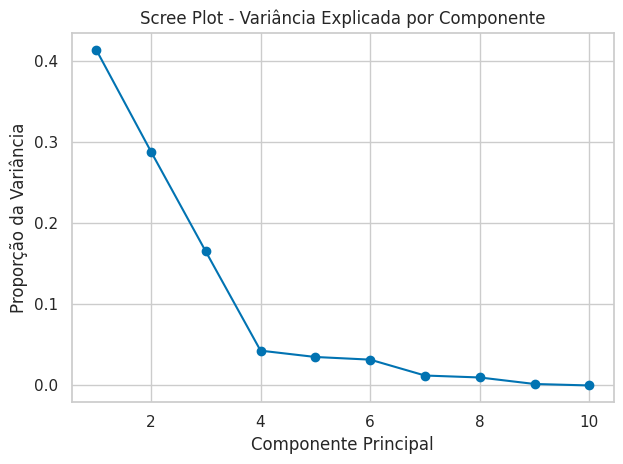

PC1: 41.34%
PC2: 28.80%
PC3: 16.50%
PC4: 4.29%
PC5: 3.51%
PC6: 3.18%
PC7: 1.22%
PC8: 0.98%
PC9: 0.18%
PC10: 0.00%


In [ ]:
# Aplica o ColumnTransformer (padronização)
X_padronizado = preprocessador.fit_transform(X)

# Aplica PCA com todos os componentes (não limita n_components ainda)
pca_full = PCA()
pca_full.fit(X_padronizado)

# Scree Plot
plt.plot(
    range(1, len(pca_full.explained_variance_ratio_)+1),
    pca_full.explained_variance_ratio_,
    marker='o'
)
plt.title('Scree Plot - Variância Explicada por Componente')
plt.xlabel('Componente Principal')
plt.ylabel('Proporção da Variância')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar numericamente
for i, v in enumerate(pca_full.explained_variance_ratio_):
    print(f"PC{i+1}: {v:.2%}")

## 6.2 Aplicação do PCA (2 componentes)

Com base no scree plot anterior, aplicamos o PCA usando **dois componentes principais**.  
Esses dois eixos (PC1 e PC2) agora representam as novas dimensões mais relevantes dos dados.

Esses valores serão usados nos modelos com PCA, tanto para regressão quanto para classificação.

In [ ]:
# Aplica PCA com 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_padronizado)

# Cria df_PCA com componentes e variáveis-alvo
df_PCA = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X.index)
df_PCA['produtividade'] = df['produtividade']
df_PCA['safra'] = df['safra']

## 6.3 Visualização 2D dos componentes principais

Aqui, projetamos os dados no plano formado pelos dois primeiros componentes principais (`PC1` × `PC2`).  
Cada ponto representa um ano, e a cor indica a classe da safra (baixa, média ou alta).

Isso nos ajuda a observar:

- Agrupamentos visuais por tipo de safra
- Separabilidade das classes no novo espaço dimensional
- Se PCA pode ajudar os modelos a generalizar melhor

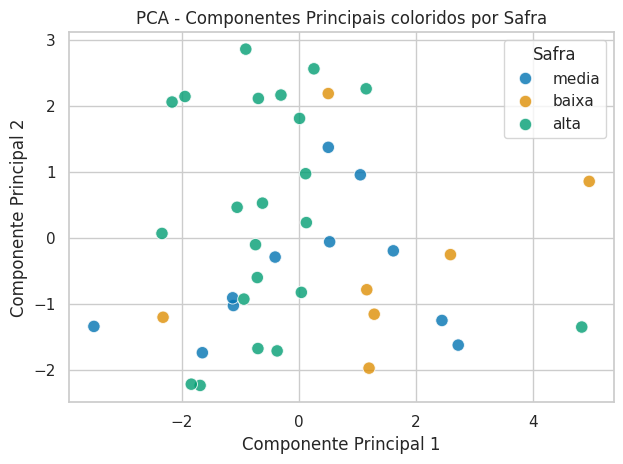

In [ ]:
sns.scatterplot(data=df_PCA, x='PC1', y='PC2', hue='safra', s=80, alpha=0.8)
plt.title('PCA - Componentes Principais coloridos por Safra')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Safra')
plt.tight_layout()
plt.show()

# 7. Previsão da Produtividade — Regressão Linear

Nesta etapa, vamos construir modelos de regressão linear para prever a produtividade da safra com base em variáveis climáticas e sazonais.

Utilizaremos dois cenários:

1. **Modelos com as variáveis originais** (sem redução de dimensionalidade)
2. **Modelos com os componentes principais** obtidos via PCA

Em ambos os cenários, aplicaremos:

- Regressão Linear Simples
- Regressão com Regularização L² (Ridge)

Ao final, faremos uma comparação dos modelos com base em métricas, visualizações e interpretação da função de custo.

## 7.1 Modelos com variáveis originais (sem PCA)

Neste primeiro cenário, utilizamos diretamente as variáveis originais do dataset para prever a produtividade.

Usaremos:

- Um modelo de Regressão Linear tradicional
- Um modelo regularizado com **Ridge**, que aplica penalização L² para reduzir o sobreajuste

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

### 7.1.1 Regressão Linear Simples

Treinamos um modelo de regressão linear usando o pipeline criado anteriormente, que já inclui a padronização dos dados numéricos.

Esse modelo tenta ajustar uma função linear para prever a produtividade com base nas variáveis climáticas e sazonais.

In [ ]:
# Pipeline: pré-processador + modelo
pipeline_original = make_pipeline(preprocessador, LinearRegression())

# Treinamento
pipeline_original.fit(X_train, y_train)

# Previsão
y_pred_orig = pipeline_original.predict(X_test)

# Avaliação
mse_orig = mean_squared_error(y_test, y_pred_orig)
rmse_orig = mse_orig ** 0.5

r2_orig = r2_score(y_test, y_pred_orig)

print(f"[Regressão linear] RMSE: {rmse_orig:.2f}  |  R²: {r2_orig:.2%}")

[Regressão linear] RMSE: 71.57  |  R²: -857.97%


### 7.1.2 Regressão Linear com Regularização (Ridge)

### 7.1.2 Regressão Linear com Regularização (Ridge)

Aplicamos agora a regularização L² com o modelo `Ridge`.  
Esse tipo de penalização ajuda a reduzir o sobreajuste, especialmente em datasets com alta variância ou multicolinearidade.

A força da penalização é controlada por um hiperparâmetro $\lambda$ (alpha).

In [ ]:
# Pipeline com regularização L2 (Ridge)
lambda_regressao = 1 # testar vários valores para lambda
pipeline_ridge = make_pipeline(preprocessador, Ridge(alpha=lambda_regressao))

# Treinamento
pipeline_ridge.fit(X_train, y_train)

# Previsão
y_pred_ridge = pipeline_ridge.predict(X_test)

# Avaliação
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"[Regularização Ridge (L²) | λ = {lambda_regressao}] RMSE: {rmse_ridge:.2f}  |  R²: {r2_ridge:.2%}")

[Regularização Ridge (L²) | λ = 1] RMSE: 68.30  |  R²: -772.31%


## 7.2 Modelos com componentes principais (PCA)

## 7.2 Modelos com componentes principais (PCA)

Neste segundo cenário, utilizamos os dois primeiros componentes principais (PC1 e PC2) obtidos com PCA para treinar os modelos.

O objetivo é verificar se a projeção em um espaço com menos dimensões melhora a capacidade do modelo de generalizar.

### 7.2.1 Regressão Linear Simples sobre PCA

### 7.2.1 Regressão Linear Simples sobre PCA

Aqui treinamos o modelo linear diretamente sobre os dois componentes principais (`PC1` e `PC2`).

In [ ]:
# Definindo X e y com base no df_PCA
X_pca = df_PCA[['PC1', 'PC2']]
y_pca = df_PCA['produtividade']

# Divisão temporal (como fizemos antes)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca, y_pca, test_size=0.2, shuffle=False
)

# Modelo linear simples com PCA
modelo_pca = LinearRegression()
modelo_pca.fit(X_pca_train, y_pca_train)

# Previsão
y_pred_pca = modelo_pca.predict(X_pca_test)

# Avaliação
rmse_pca = mean_squared_error(y_pca_test, y_pred_pca) ** 0.5
r2_pca = r2_score(y_pca_test, y_pred_pca)

print(f"[PCA + Regressão linear] RMSE: {rmse_pca:.2f}  |  R²: {r2_pca:.2%}")

[PCA + Regressão linear] RMSE: 43.28  |  R²: -250.26%


### 7.2.2 Regressão Linear com Regularização (Ridge) sobre PCA

### 7.2.2 Regressão Linear com Regularização (Ridge) sobre PCA

Aplicamos o modelo `Ridge` sobre o espaço PCA, combinando redução de dimensionalidade com regularização para minimizar o erro e o sobreajuste.

In [ ]:
# Modelo com Ridge sobre PCA
lambda_regressao = 1 # testar vários valores para lambda
modelo_pca_ridge = Ridge(alpha=lambda_regressao)
modelo_pca_ridge.fit(X_pca_train, y_pca_train)

# Previsão
y_pred_pca_ridge = modelo_pca_ridge.predict(X_pca_test)

# Avaliação
rmse_pca_ridge = mean_squared_error(y_pca_test, y_pred_pca_ridge) ** 0.5
r2_pca_ridge = r2_score(y_pca_test, y_pred_pca_ridge)

print(f"[PCA + Regularização Ridge (L²) | λ = {lambda_regressao}] RMSE: {rmse_pca_ridge:.2f}  |  R²: {r2_pca_ridge:.2%}")

[PCA + Regularização Ridge (L²) | λ = 1] RMSE: 42.98  |  R²: -245.38%


## 7.3 Comparação dos modelos

Com os modelos treinados, agora comparamos seu desempenho por diferentes perspectivas:

- Tabela com métricas (RMSE e R²)
- Curvas de previsão vs. variáveis explicativas
- Gráficos da função de custo (1D e 2D)
- Análise gráfica dos resíduos

### 7.3.1 Tabela Comparativa — Regressão regularizada com e sem PCA

Aqui comparamos os resultados obtidos pelos quatro modelos testados:

- Regressão Linear Simples
- Regressão Ridge
- Regressão com PCA
- Regressão com PCA + Ridge

As métricas utilizadas são:

- **RMSE** (Root Mean Squared Error): mede o erro médio entre as previsões e os valores reais.
- **R²** (coeficiente de determinação): indica quanto da variância da variável-alvo é explicada pelo modelo.

Quanto menor o RMSE e maior o R², melhor o modelo.

| λ (Ridge) | RMSE sem PCA | R² sem PCA    | RMSE com PCA | R² com PCA    |
|-----------|--------------|---------------|---------------|---------------|
| 0         | 71.57        | –857.97%      | 43.28         | –250.26%      |
| 0.1       | 71.19        | –847.87%      | 43.25         | –249.76%      |
| 1         | 68.30        | –772.31%      | 42.98         | –245.38%      |
| 10        | 54.97        | –465.14%      | 40.61         | –208.48%      |
| 100       | 34.91        | –127.95%      | 31.20         | –82.07%       |
| 1000      | 26.38        | –30.09%       | 25.97         | –26.16%       |
| 10000     | 25.61        | –22.67%       | 25.57         | –22.30%       |
| 30000     | 25.56        | –22.21%       | 25.55         | –22.09%       |
| 100000    | 25.55        | –22.06%       | 25.54         | –22.02%       |
| 300000    | 25.54        | –22.01%       | 25.54         | –22.00%       |
| 1000000   | 25.54        | –22.00%       | 25.54         | –21.99%       |


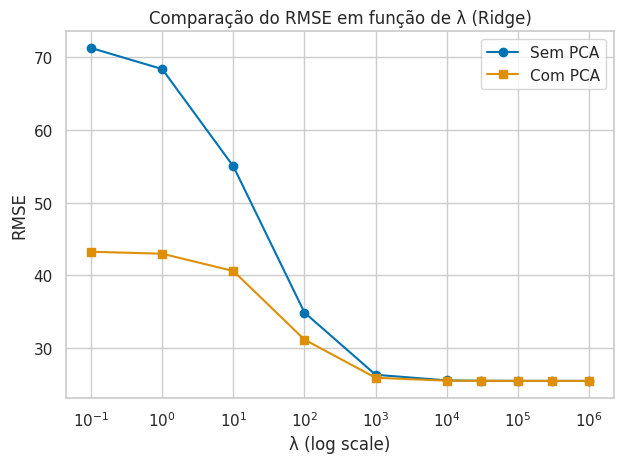

In [ ]:
# Simulação dos dados para plotagem
lambdas = [0.1, 1, 10, 100, 1000, 10000, 30000, 100000, 300000, 1000000]
rmse_sem_pca = [71.19, 68.30, 54.97, 34.91, 26.38, 25.61, 25.56, 25.55, 25.54, 25.54]
rmse_com_pca = [43.25, 42.98, 40.61, 31.20, 25.97, 25.57, 25.55, 25.54, 25.54, 25.54]

plt.plot(lambdas, rmse_sem_pca, marker='o', label='Sem PCA')
plt.plot(lambdas, rmse_com_pca, marker='s', label='Com PCA')
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("RMSE")
plt.title("Comparação do RMSE em função de λ (Ridge)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

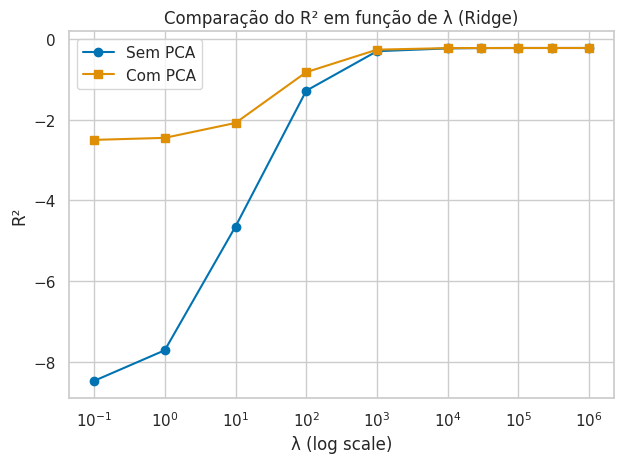

In [ ]:
# R² para cada lambda (sem e com PCA)
r2_sem_pca = [-8.48, -7.72, -4.65, -1.28, -0.30, -0.23, -0.2221, -0.2206, -0.2201, -0.2200]
r2_com_pca = [-2.50, -2.45, -2.08, -0.82, -0.2616, -0.2230, -0.2209, -0.2202, -0.2200, -0.2199]

plt.plot(lambdas, r2_sem_pca, marker='o', label='Sem PCA')
plt.plot(lambdas, r2_com_pca, marker='s', label='Com PCA')
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("R²")
plt.title("Comparação do R² em função de λ (Ridge)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 7.3.2 Relação entre variáveis e produtividade

Aqui comparamos os valores reais de produtividade com as previsões feitas por cada modelo, para cada variável explicativa.

Para cada variável (ex: temperatura, umidade, chuva), os gráficos mostram:

- Os pontos reais (em vermelho)
- A curva prevista por cada modelo:
  - Linear sem PCA
  - Ridge sem PCA
  - Linear com PCA
  - Ridge com PCA

Também incluímos gráficos para os dois componentes principais (`PC1` e `PC2`), que são combinações das variáveis originais.

Essa visualização ajuda a entender:

- O tipo de relação entre as variáveis e a produtividade
- O comportamento qualitativo dos modelos
- Se o PCA gerou representações mais alinhadas com a saída

In [ ]:
def plot_modelos_para_variavel(x_var, X, y, scaler, pca_model, modelo_linear, modelo_ridge, modelo_pca, modelo_pca_ridge):

    x_index = X.columns.get_loc(x_var)
    x_vals = np.linspace(X[x_var].min(), X[x_var].max(), 100)
    X_mean = X.mean().to_numpy()

    X_input = np.tile(X_mean, (100, 1))
    X_input[:, x_index] = x_vals
    X_input_df = pd.DataFrame(X_input, columns=X.columns)  # ⬅️ usa os mesmos nomes
    X_input_scaled = scaler.transform(X_input_df)
    X_input_pca = pca_model.transform(X_input_scaled)

    y_linear = modelo_linear.predict(X_input_scaled)
    y_ridge = modelo_ridge.predict(X_input_scaled)
    y_pca = modelo_pca.predict(X_input_pca)
    y_pca_ridge = modelo_pca_ridge.predict(X_input_pca)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[x_var], y=y, color='red', label='Dados reais', s=50, edgecolor='black')
    plt.plot(x_vals, y_linear, label='Linear', linestyle='-', color='blue')
    plt.plot(x_vals, y_ridge, label='Ridge (λ=1.000.000)', linestyle='--', color='orange')
    plt.plot(x_vals, y_pca, label='PCA + Linear', linestyle='-.', color='green')
    plt.plot(x_vals, y_pca_ridge, label='PCA + Ridge (λ=100.000)', linestyle=':', color='purple')
    plt.xlabel(x_var)
    plt.ylabel('Produtividade (kg/ha)')
    plt.title(f'Comparação de modelos — {x_var}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# 1. Reconstrução de X e y
X = df[[
    'chuva_flor', 'chuva_colheita', 'chuva_total',
    'anomalia_flor', 'temp_flor', 'umid_flor', 'chuva_relativa'
]]
y = df['produtividade']

# 2. Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA
pca_model = PCA(n_components=2)
X_pca = pca_model.fit_transform(X_scaled)
# Converte o array PCA em DataFrame com nomes
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df.index)
df[['PC1', 'PC2']] = df_pca

# 4. Modelos treinados separadamente
modelo_linear = LinearRegression().fit(X_scaled, y)
modelo_ridge = Ridge(alpha=1e6).fit(X_scaled, y)
modelo_pca = LinearRegression().fit(X_pca, y)
modelo_pca_ridge = Ridge(alpha=1e5).fit(X_pca, y)

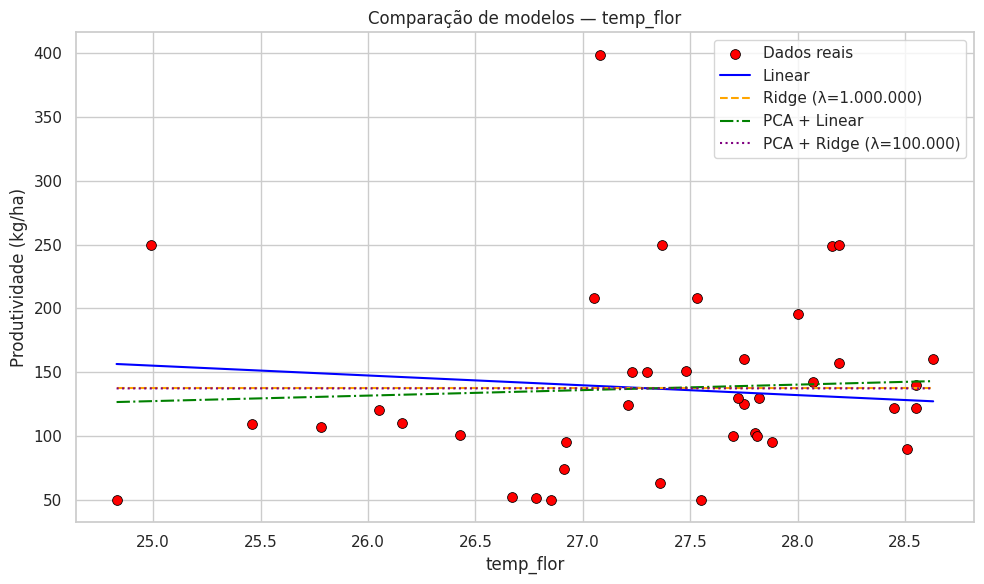

In [ ]:
plot_modelos_para_variavel('temp_flor', X, y, scaler, pca_model, modelo_linear, modelo_ridge, modelo_pca, modelo_pca_ridge)

---

#### 👀 Explorando todas as variáveis

A seguir, apresentamos a comparação dos modelos para **todas as variáveis explicativas** do projeto.

Você pode navegar pelos gráficos abaixo e observar:

- Como cada modelo tenta ajustar a relação entre a variável e a produtividade
- Qual curva parece mais adequada
- Se algum modelo apresenta padrão de sub ou superestimação

> 🧠 Essa parte pode ser densa — sinta-se à vontade para analisar com calma ou pular para a próxima subseção após alguns exemplos.

In [ ]:
from IPython.display import Markdown, display

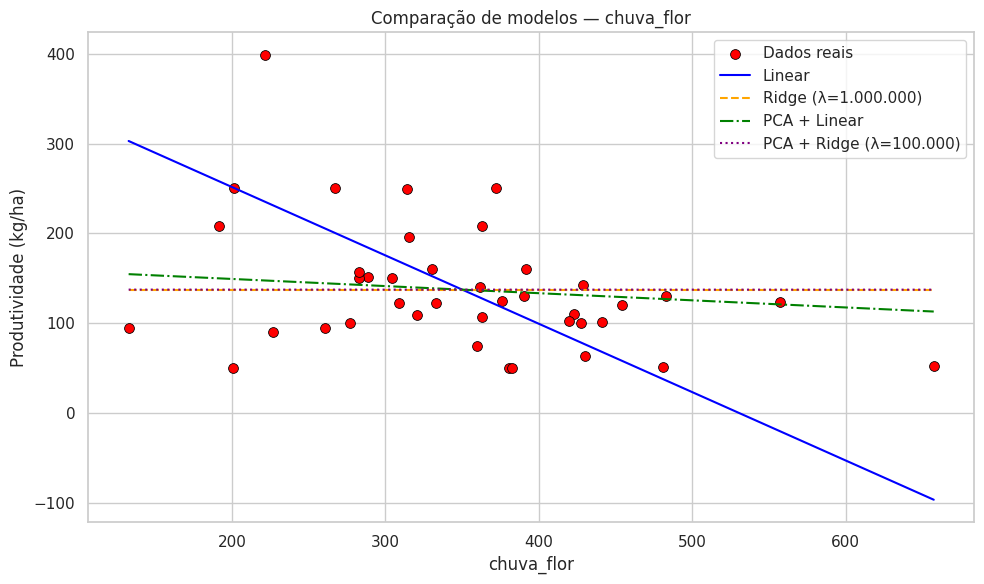

### ⬇️ Próxima variável

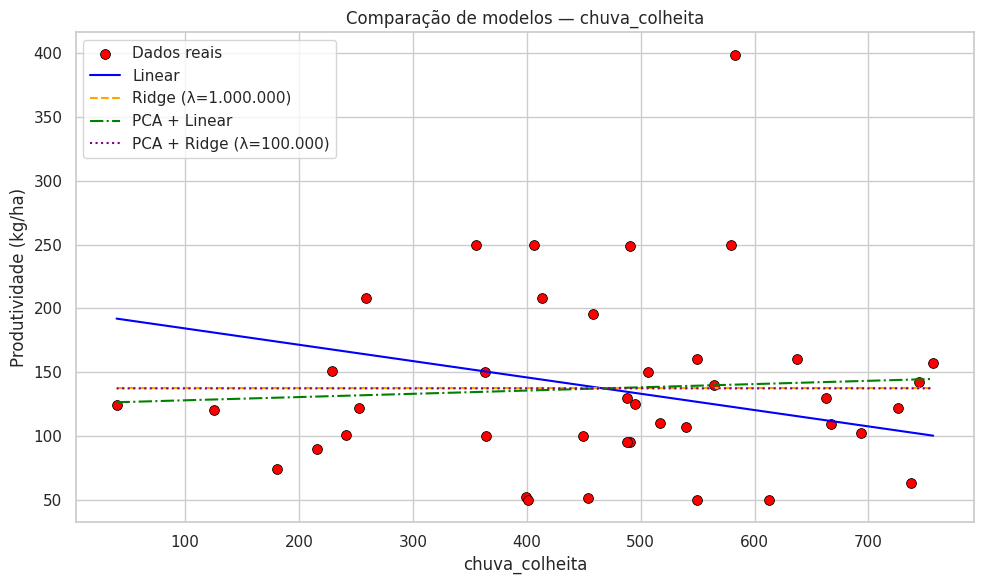

### ⬇️ Próxima variável

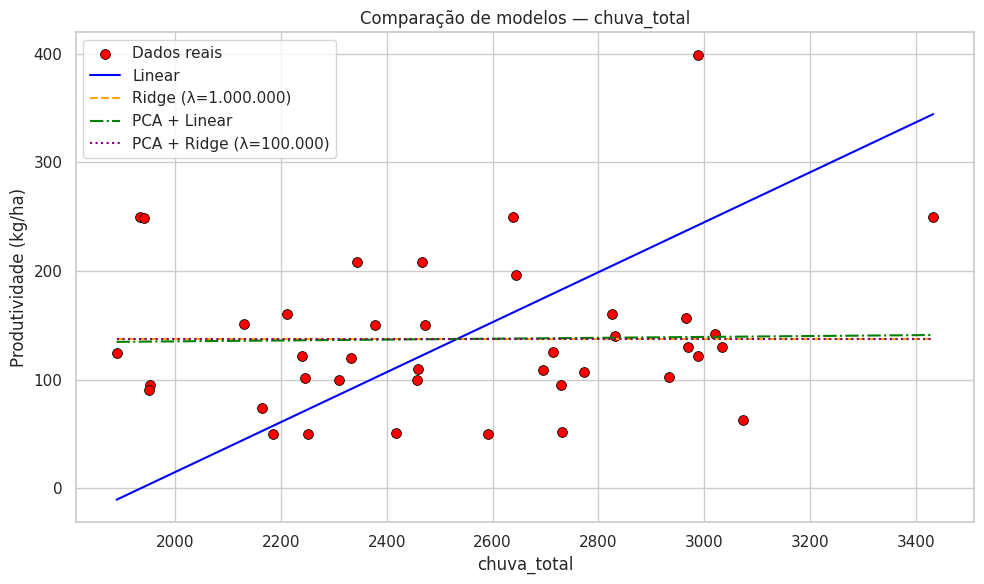

### ⬇️ Próxima variável

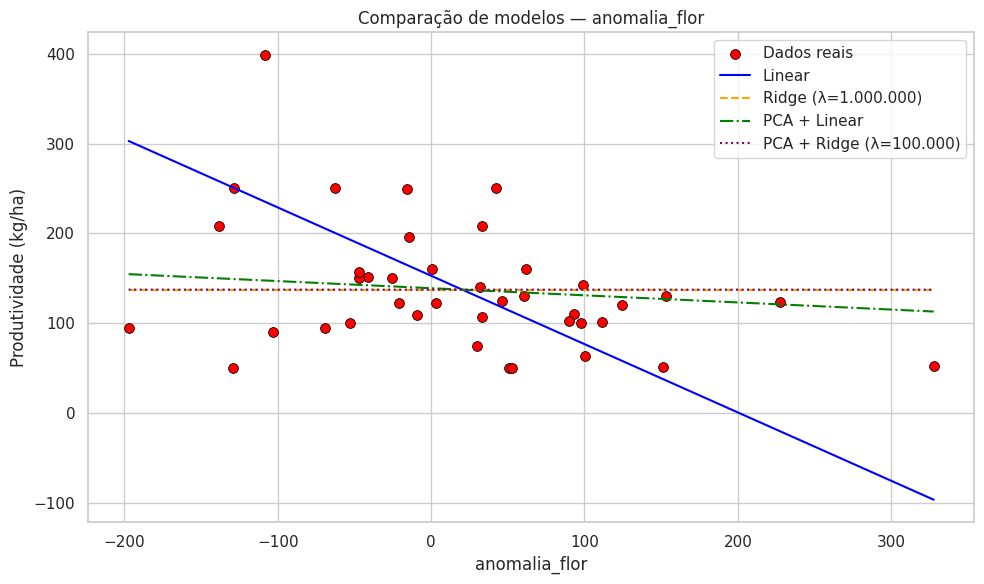

### ⬇️ Próxima variável

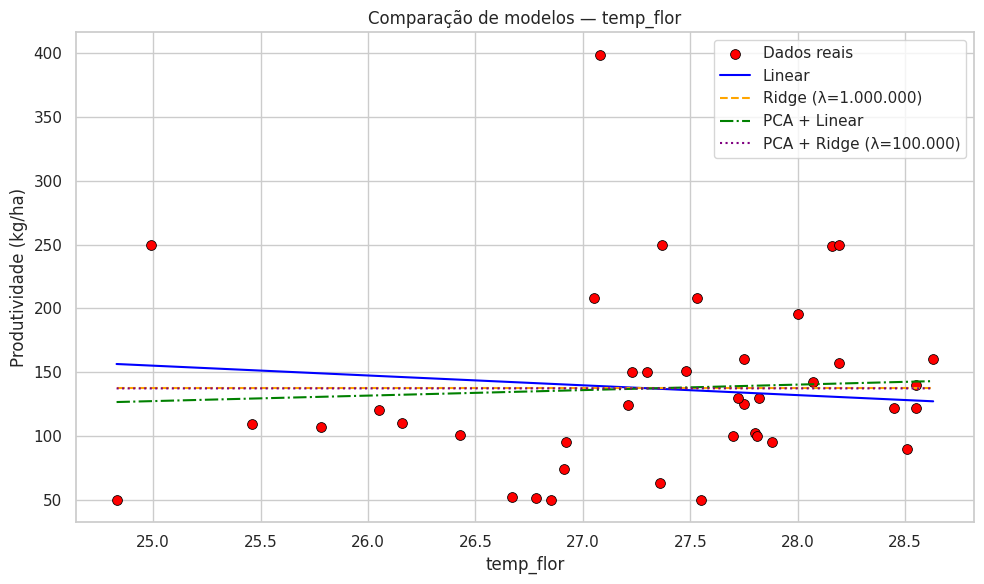

### ⬇️ Próxima variável

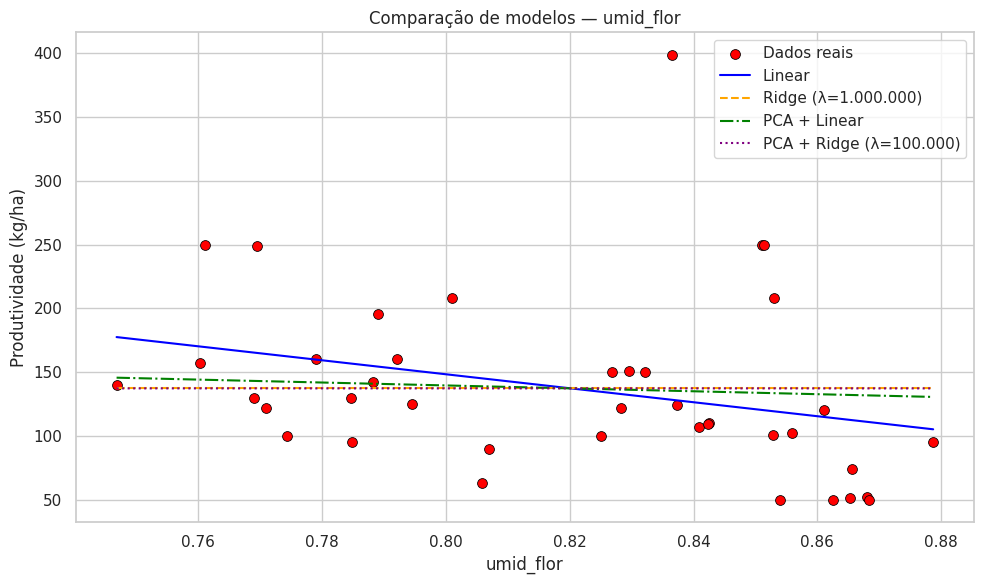

### ⬇️ Próxima variável

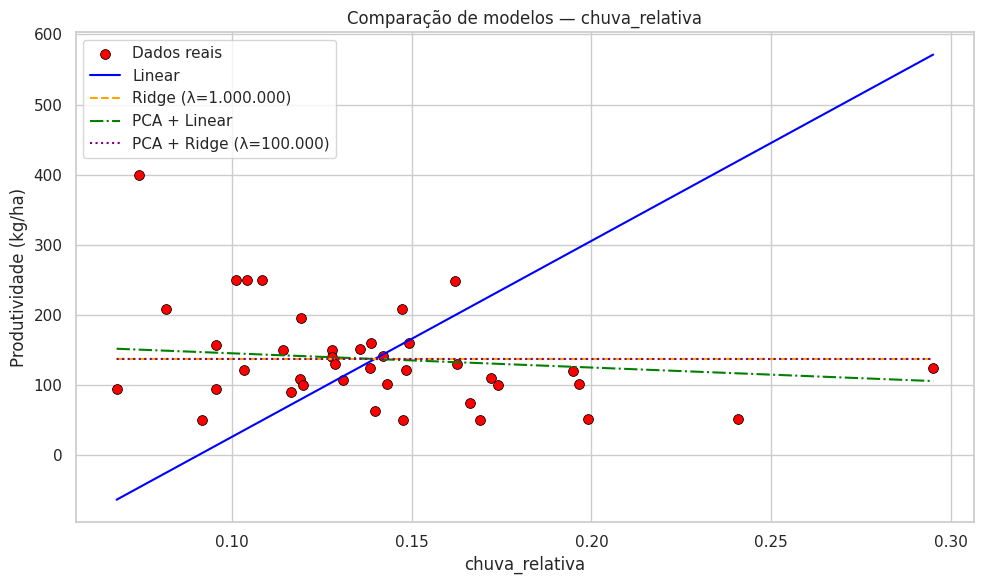

### ⬇️ Próxima variável

In [ ]:
# Plotar todas as variáveis explicativas
variaveis_explicativas = [
    'chuva_flor', 'chuva_colheita', 'chuva_total',
    'anomalia_flor', 'temp_flor', 'umid_flor', 'chuva_relativa'
]

for var in variaveis_explicativas:
    plot_modelos_para_variavel(
        var,
        X,
        y,
        scaler,
        pca_model,
        modelo_linear,
        modelo_ridge,
        modelo_pca,
        modelo_pca_ridge
    )
    display(Markdown("### ⬇️ Próxima variável"))

### 7.3.3 Função custo

A função de custo é uma medida de erro total do modelo — ela indica "o quão longe" estão as previsões em relação aos valores reais.

Na regressão linear, a função de custo mais comum é o **erro quadrático médio (MSE)**, também chamado de:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$$

---

### 🔍 O que fazemos nesta seção:

- **1D**: Visualizamos como o erro varia para um único coeficiente da regressão
- **2D**: Geramos superfícies que mostram a forma da função de custo para pares de variáveis
- **PCA**: Também plotamos a superfície da função de custo no plano `PC1 × PC2`

Esses gráficos ajudam a entender **como o modelo "procura" os melhores coeficientes**, e a natureza suave da função que ele está otimizando.

#### Curva 1D da função custo

In [ ]:
def plot_funcao_custo_1D(x_var, X, y, intervalo=(-200, 200), pontos=200):
    """
    Plota a função de custo J(θ₁) para uma regressão univariada com a variável x_var.
    """
    x = X[x_var].values
    y = y.values
    m = len(y)

    # Centraliza x para eliminar o intercepto implicitamente
    x_centralizado = x - x.mean()

    theta1_vals = np.linspace(intervalo[0], intervalo[1], pontos)
    custos = [(1 / (2 * m)) * np.sum((theta1 * x_centralizado - y) ** 2) for theta1 in theta1_vals]

    plt.figure(figsize=(8, 5))
    plt.plot(theta1_vals, custos)
    plt.xlabel("θ₁")
    plt.ylabel("J(θ₁)")
    plt.title(f"Função de Custo - {x_var} (x centralizado)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

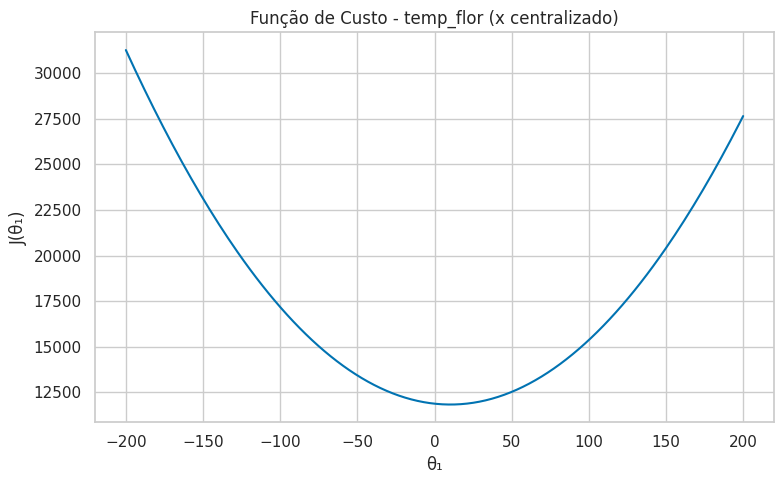

In [ ]:
plot_funcao_custo_1D('temp_flor', X, y)

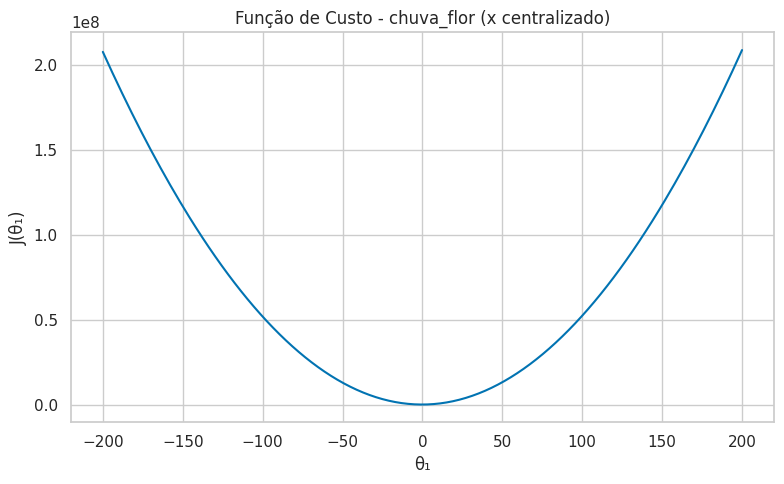

### ⬇️ Próxima função custo

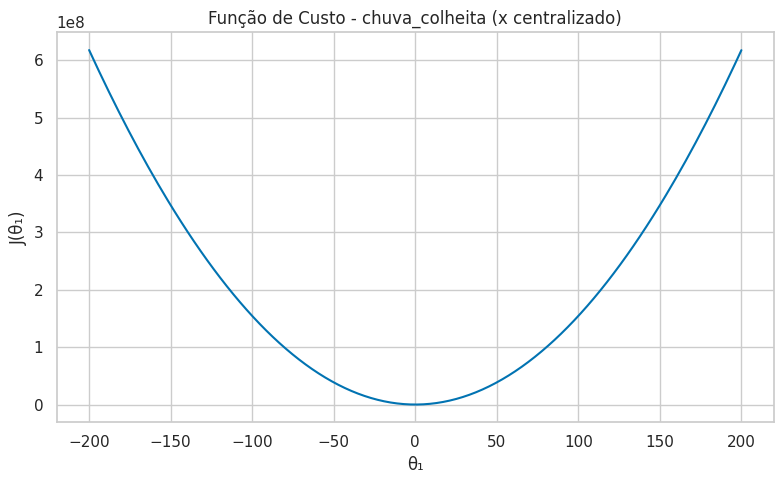

### ⬇️ Próxima função custo

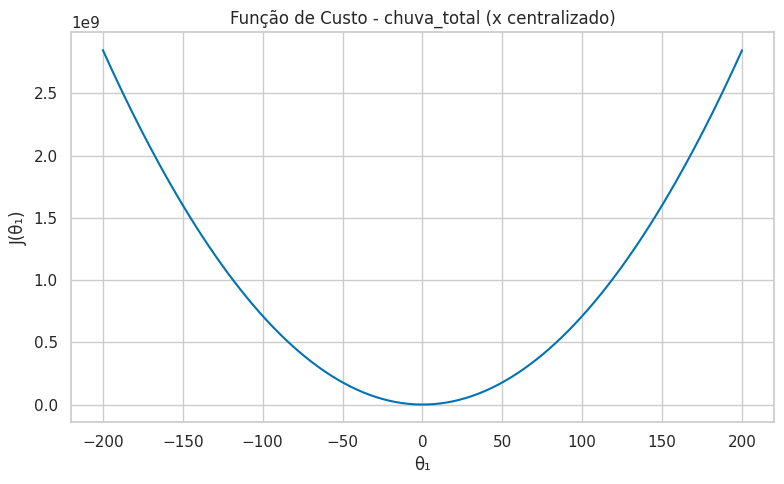

### ⬇️ Próxima função custo

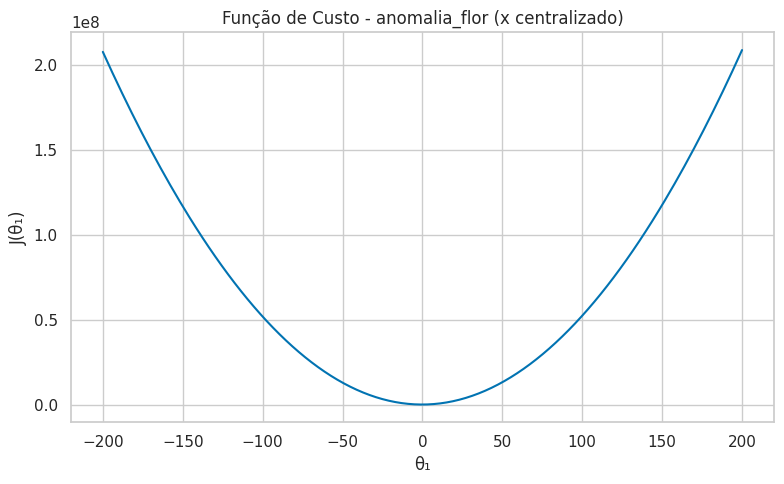

### ⬇️ Próxima função custo

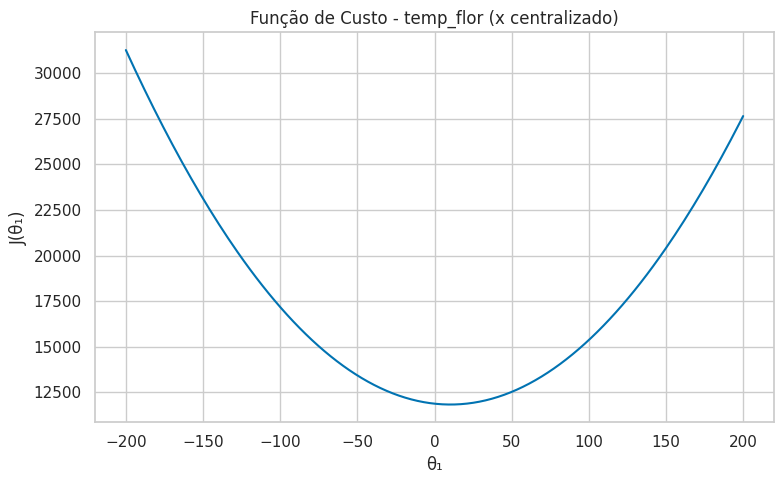

### ⬇️ Próxima função custo

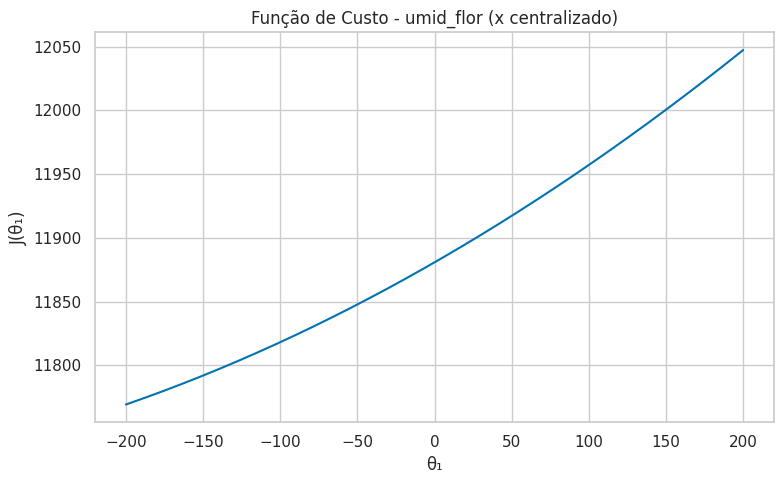

### ⬇️ Próxima função custo

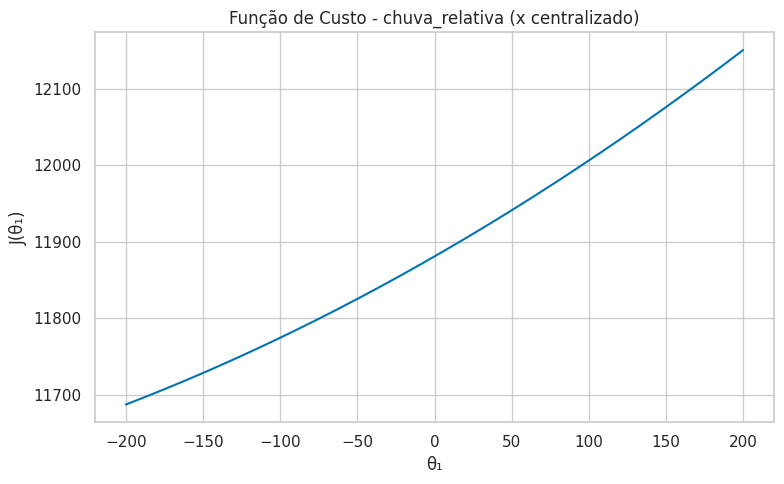

### ⬇️ Próxima função custo

In [ ]:
# Plotar todos os gráficos de função custo
variaveis_explicativas = [
    'chuva_flor', 'chuva_colheita', 'chuva_total',
    'anomalia_flor', 'temp_flor', 'umid_flor', 'chuva_relativa'
]

for var in variaveis_explicativas:
    plot_funcao_custo_1D(var, X, y)
    display(Markdown("### ⬇️ Próxima função custo"))

#### Superfície 2D da função custo

In [ ]:
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def plot_funcao_custo_2D(x_vars, X, y, range_theta=(-200, 200), pontos=100):
    """
    Plota a superfície da função de custo J(θ₁, θ₂) para duas variáveis.
    """
    x1 = X[x_vars[0]].values
    x2 = X[x_vars[1]].values
    y = y.values
    m = len(y)

    # Matriz de entrada com intercepto
    X_mat = np.vstack([np.ones(m), x1, x2]).T

    # Geração de grid de θ₁ e θ₂ (intercepto θ₀ fixado em 0 para simplificação)
    theta1_vals = np.linspace(range_theta[0], range_theta[1], pontos)
    theta2_vals = np.linspace(range_theta[0], range_theta[1], pontos)
    J_vals = np.zeros((pontos, pontos))

    for i in range(pontos):
        for j in range(pontos):
            theta = np.array([0, theta1_vals[i], theta2_vals[j]])  # θ₀ = 0
            h = X_mat @ theta
            J_vals[j, i] = (1 / (2 * m)) * np.sum((h - y) ** 2)

    # Superfície
    T1, T2 = np.meshgrid(theta1_vals, theta2_vals)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T1, T2, J_vals, cmap='viridis', edgecolor='none', alpha=0.9)

    ax.set_xlabel(f"θ₁ ({x_vars[0]})")
    ax.set_ylabel(f"θ₂ ({x_vars[1]})")
    ax.set_zlabel("J(θ)")
    ax.set_title(f"Superfície da Função de Custo — {x_vars[0]} e {x_vars[1]}")
    # plt.tight_layout()
    fig.subplots_adjust(right=0.5)
    plt.show()

def gerar_todas_superficies_2D(X, y, intervalo=(-200, 200), pontos=100):
    """
    Gera a superfície da função de custo J(θ₁, θ₂) para todas as combinações 2 a 2 de variáveis de X.
    """
    pares_variaveis = list(combinations(X.columns, 2))
    for x_pair in pares_variaveis:
        plot_funcao_custo_2D(x_pair, X, y, range_theta=intervalo, pontos=pontos)
        display(Markdown("### ⬇️ Próxima superfície"))

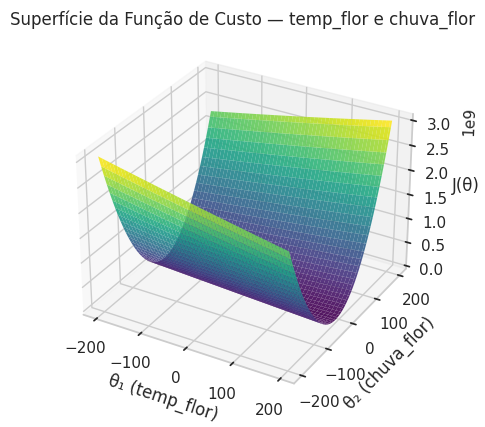

In [ ]:
# Para um gráfico específico
plot_funcao_custo_2D(['temp_flor', 'chuva_flor'], X, y)

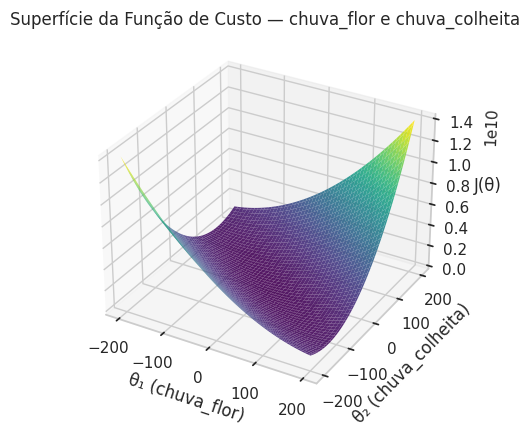

### ⬇️ Próxima superfície

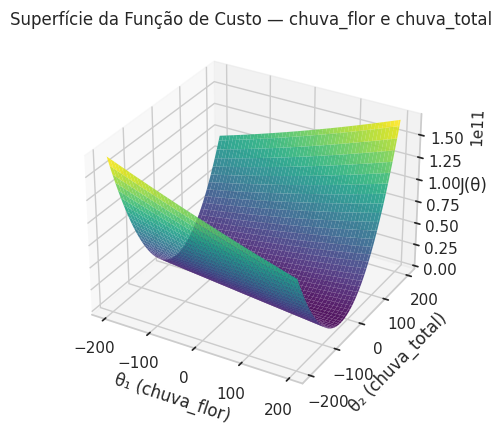

### ⬇️ Próxima superfície

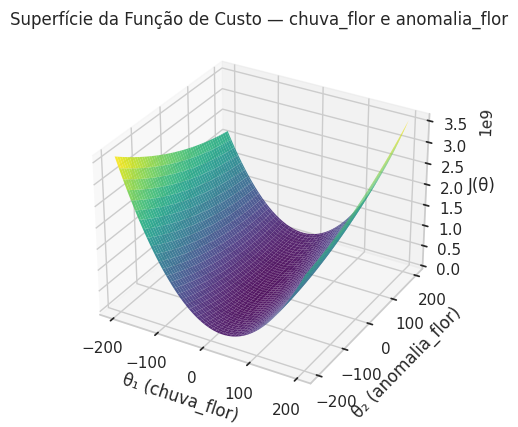

### ⬇️ Próxima superfície

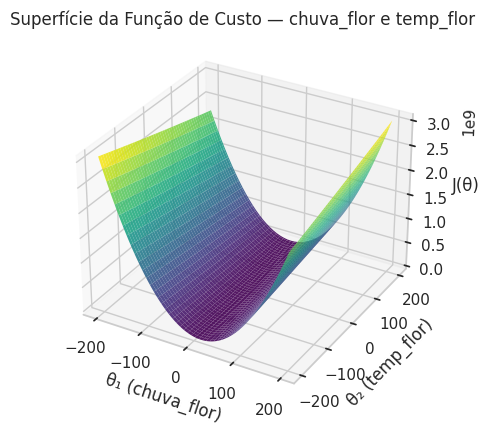

### ⬇️ Próxima superfície

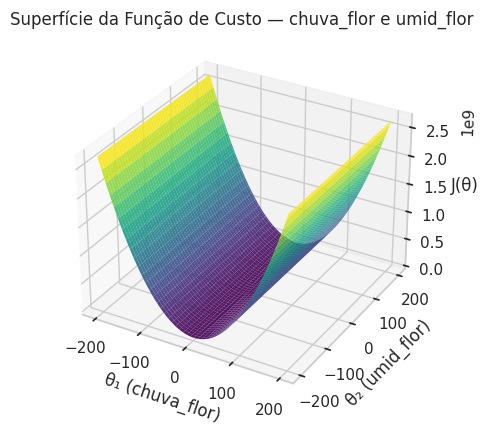

### ⬇️ Próxima superfície

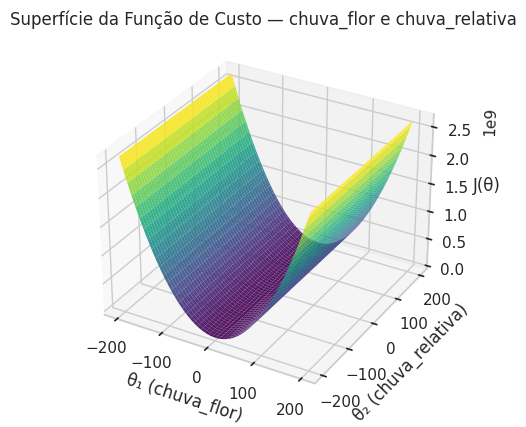

### ⬇️ Próxima superfície

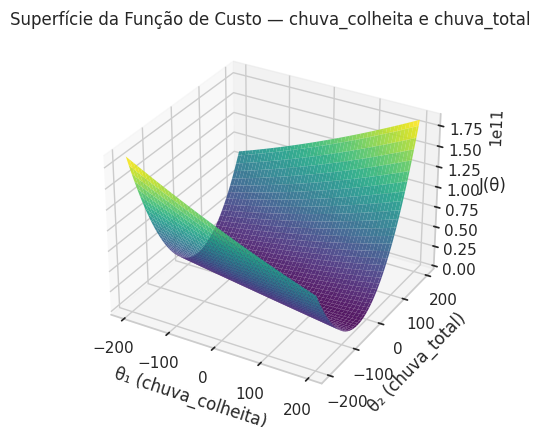

### ⬇️ Próxima superfície

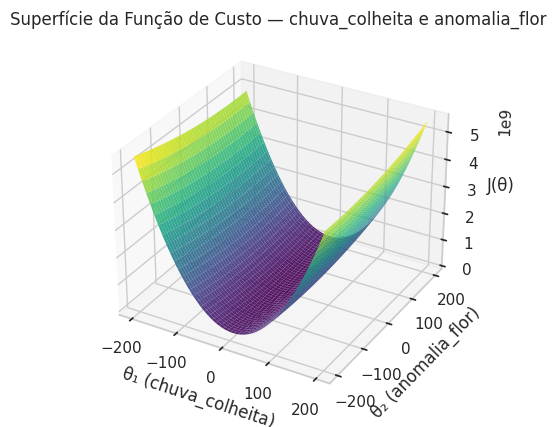

### ⬇️ Próxima superfície

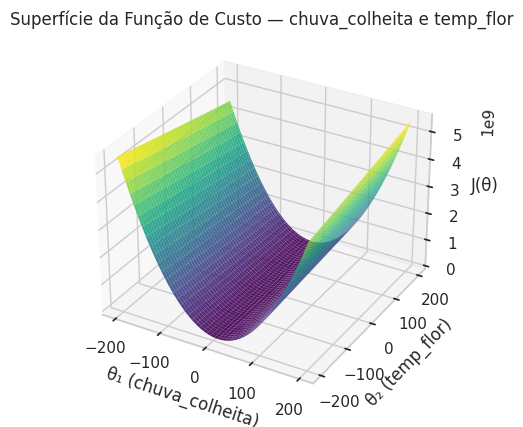

### ⬇️ Próxima superfície

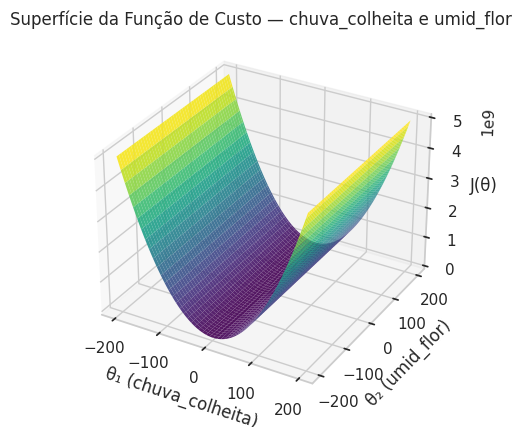

### ⬇️ Próxima superfície

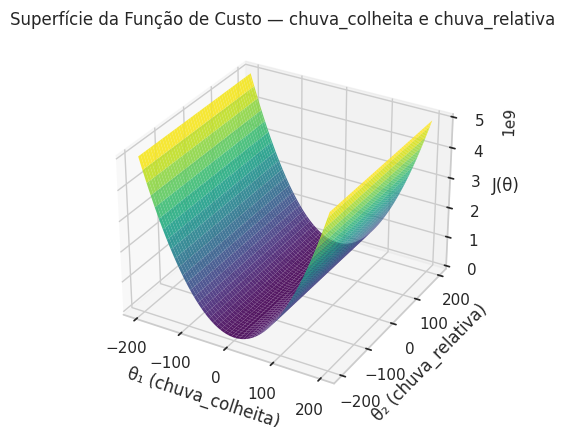

### ⬇️ Próxima superfície

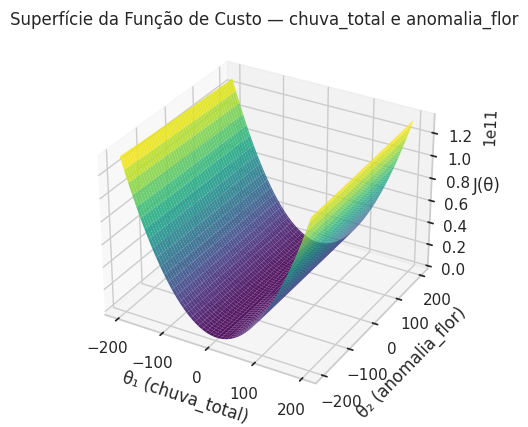

### ⬇️ Próxima superfície

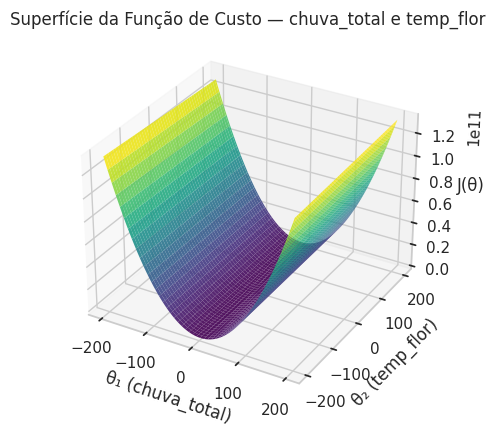

### ⬇️ Próxima superfície

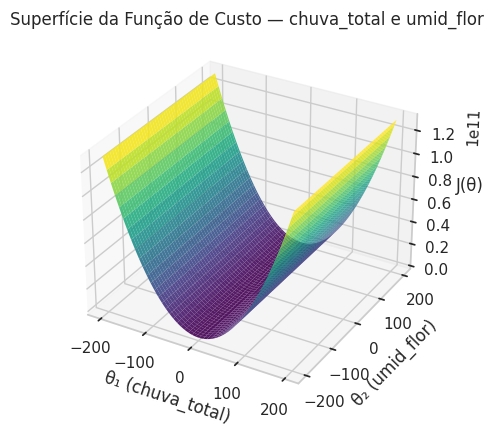

### ⬇️ Próxima superfície

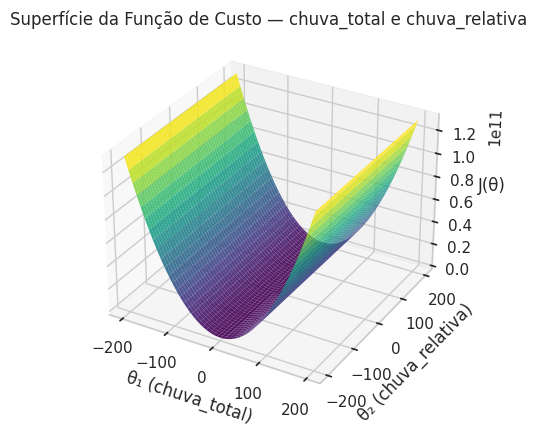

### ⬇️ Próxima superfície

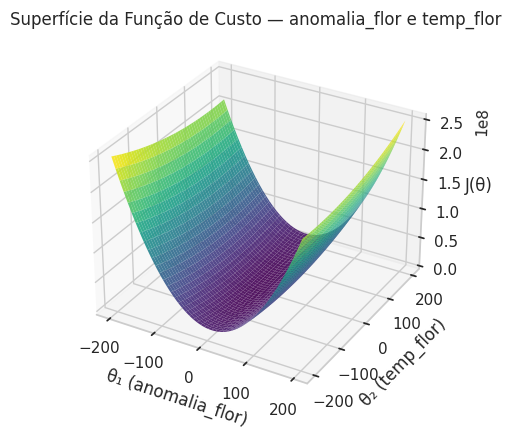

### ⬇️ Próxima superfície

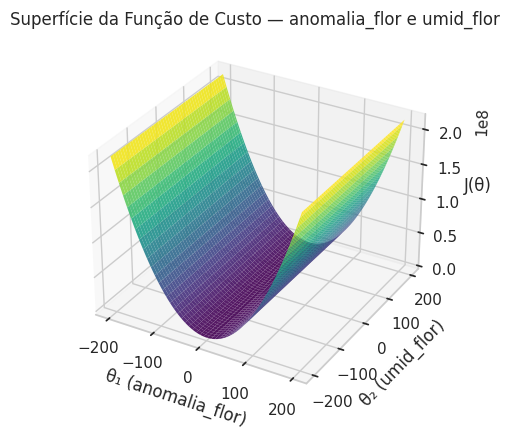

### ⬇️ Próxima superfície

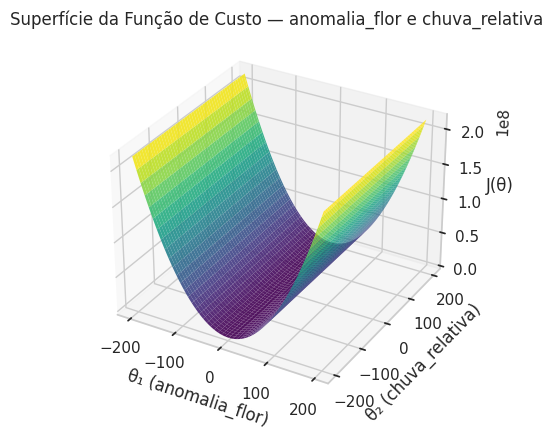

### ⬇️ Próxima superfície

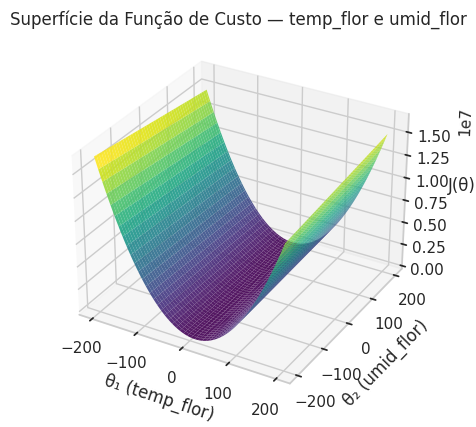

### ⬇️ Próxima superfície

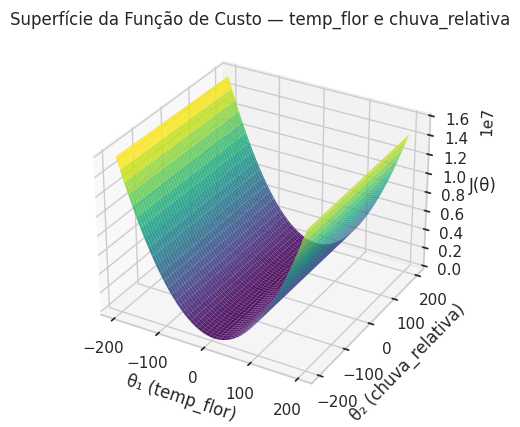

### ⬇️ Próxima superfície

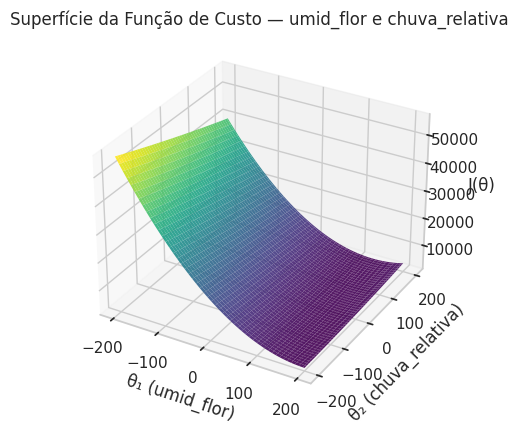

### ⬇️ Próxima superfície

In [ ]:
# Para gerar todos automaticamente
gerar_todas_superficies_2D(X, y)

#### Superfície 2D da função custo com PCA

In [ ]:
def plot_funcao_custo_2D_PCA(X_pca, y, range_theta=(-200, 200), pontos=100):
    """
    Plota a superfície da função de custo J(θ₁, θ₂) usando os componentes principais PC1 e PC2.
    """
    pc1 = X_pca[:, 0]
    pc2 = X_pca[:, 1]
    m = len(y)

    # Matriz de entrada com intercepto
    X_mat = np.vstack([np.ones(m), pc1, pc2]).T

    # Grid de valores de θ₁ e θ₂
    theta1_vals = np.linspace(range_theta[0], range_theta[1], pontos)
    theta2_vals = np.linspace(range_theta[0], range_theta[1], pontos)
    J_vals = np.zeros((pontos, pontos))

    for i in range(pontos):
        for j in range(pontos):
            theta = np.array([0, theta1_vals[i], theta2_vals[j]])
            h = X_mat @ theta
            J_vals[j, i] = (1 / (2 * m)) * np.sum((h - y) ** 2)

    # Superfície 3D
    T1, T2 = np.meshgrid(theta1_vals, theta2_vals)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T1, T2, J_vals, cmap='viridis', edgecolor='none', alpha=0.9)

    ax.set_xlabel("θ₁ (PC1)")
    ax.set_ylabel("θ₂ (PC2)")
    ax.set_zlabel("J(θ)")
    ax.set_title("Superfície da Função de Custo — Componentes Principais (PCA)")
    fig.subplots_adjust(right=0.85)
    plt.show()

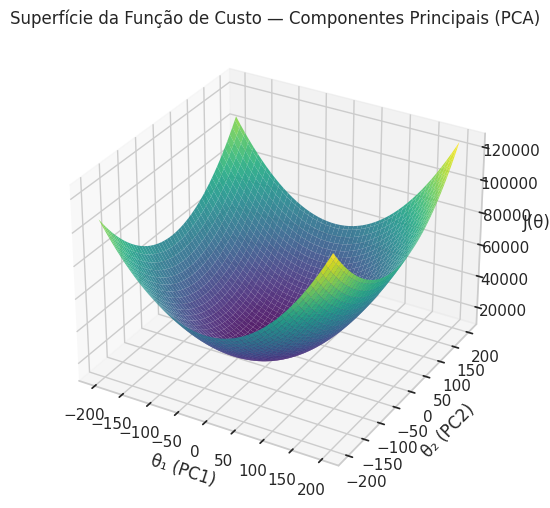

In [ ]:
plot_funcao_custo_2D_PCA(X_pca, y)

> 📌 Repare que a superfície da função de custo no espaço `PC1 × PC2` é quase simétrica.
>
> Isso acontece porque o PCA gera variáveis ortogonais entre si, o que elimina a multicolinearidade.
> Como resultado, o gradiente desce de forma mais eficiente, sem precisar "ziguezaguear" por vales inclinados.

### 7.3.4 Análise gráfica dos resíduos

Os resíduos são a diferença entre os valores reais de produtividade e os valores previstos pelos modelos.

Analisar os resíduos ajuda a responder perguntas como:

- O modelo está errando mais para safras baixas, médias ou altas?
- Existe algum viés sistemático nas previsões?
- O erro parece aleatório (bom sinal) ou segue um padrão?

---

#### 🎯 O que esperamos ver:

- Distribuição **simétrica** dos resíduos em torno de zero
- Nenhuma tendência crescente ou decrescente clara
- Resíduos mais próximos de zero → melhor desempenho

Vamos comparar os resíduos de cada modelo para investigar se eles estão cometendo erros diferentes ou semelhantes.

In [ ]:
def plot_residuos(y_true, y_pred, titulo):
    """
    Plota os resíduos de um modelo específico.
    """
    residuos = y_true - y_pred
    plt.figure(figsize=(8, 4))
    plt.scatter(y_pred, residuos, color='royalblue', alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Previsão")
    plt.ylabel("Resíduo")
    plt.title(f"Resíduos — {titulo}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("\n")

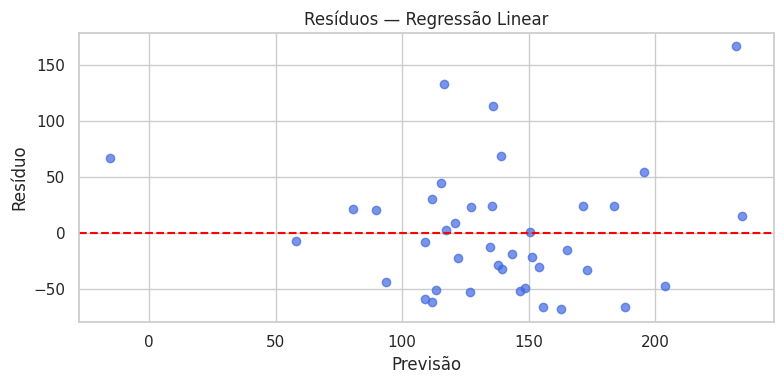

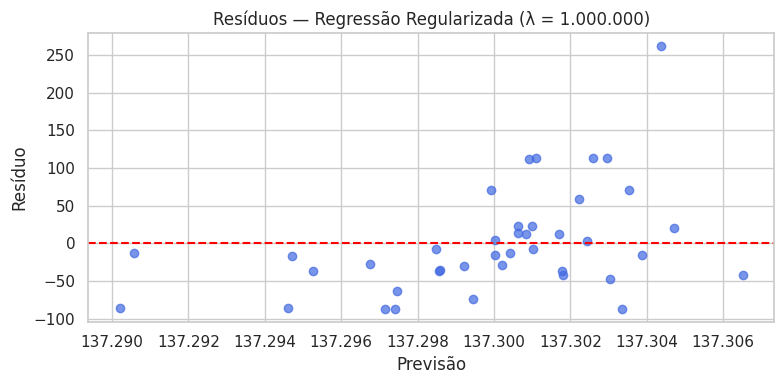

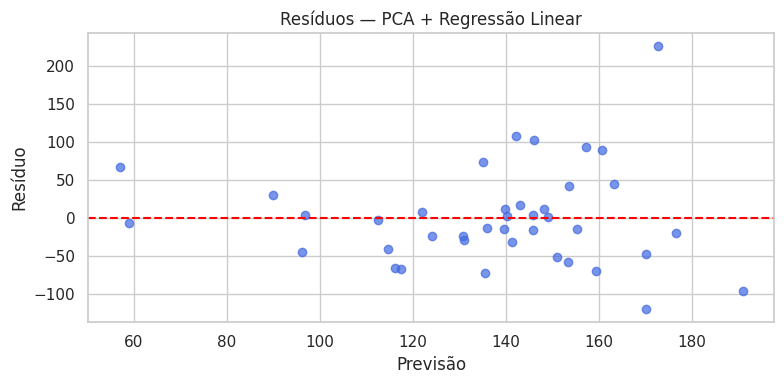

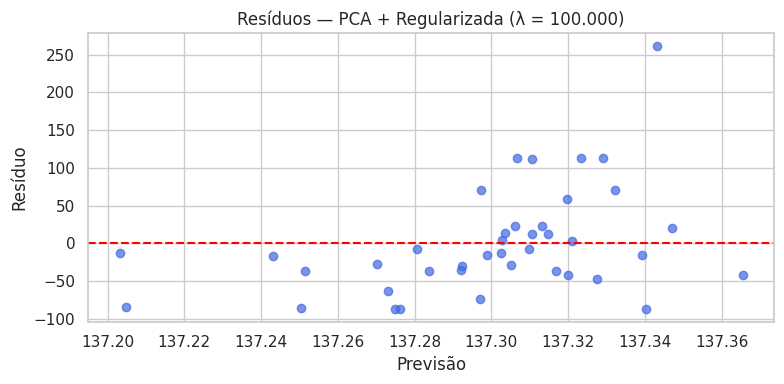

In [ ]:
# Previsões
y_pred_linear = modelo_linear.predict(X_scaled)
y_pred_ridge = modelo_ridge.predict(X_scaled)
y_pred_pca = modelo_pca.predict(X_pca)
y_pred_pca_ridge = modelo_pca_ridge.predict(X_pca)

# Gráficos de resíduos
plot_residuos(y, y_pred_linear, "Regressão Linear")
plot_residuos(y, y_pred_ridge, "Regressão Regularizada (λ = 1.000.000)")
plot_residuos(y, y_pred_pca, "PCA + Regressão Linear")
plot_residuos(y, y_pred_pca_ridge, "PCA + Regularizada (λ = 100.000)")

### 🧠 Discussão: Trade-offs na Regressão Linear Regularizada

Ao longo desta seção, exploramos diferentes estratégias para prever a produtividade agrícola usando regressão linear.

### 🔁 Comparações relevantes:

- **Modelos sem PCA**: utilizam todas as variáveis originais. Podem ter desempenho instável devido à multicolinearidade ou ruído.
- **Modelos com PCA**: utilizam componentes principais que resumem as variações mais relevantes. São mais estáveis, mas menos interpretáveis.
- **Regressão Linear vs Ridge**: a regularização com Ridge evita sobreajuste, especialmente em datasets pequenos como o nosso.

---

### ✅ O que aprendemos:

- A **redução de dimensionalidade** pode simplificar os dados e ajudar na generalização.
- A **regularização** é eficaz para estabilizar o modelo, mesmo que não resolva todos os problemas.
- A análise gráfica dos resíduos e da função de custo fornece insights sobre onde o modelo falha.

---

Ao fim desta seção, temos modelos capazes de prever a produtividade com base em diferentes abordagens.  
Na próxima etapa, mudamos de perspectiva: vamos **classificar a safra** como baixa, média ou alta.

### 🧠 Discussão: Trade-offs na Regressão Linear Regularizada

Ao longo desta seção, exploramos como diferentes configurações impactam a qualidade da previsão da produtividade do guaraná. A comparação entre os cenários com e sem **PCA** e com diferentes níveis de **regularização L2 (Ridge)** nos permite tirar algumas conclusões importantes:

- **Modelos sem regularização** (`λ = 0`) apresentam desempenho desastroso, especialmente sem PCA, com RMSE elevado e R² extremamente negativo. Isso indica **sobreajuste severo**, mesmo com poucos dados — resultado da colinearidade entre as variáveis e da instabilidade dos coeficientes da regressão.

- A **introdução da regularização L2** controla esse comportamento explosivo. À medida que aumentamos `λ`, observamos uma **redução significativa do erro (RMSE)** até um ponto de estabilização. No entanto, esse ganho vem com um **trade-off natural**: quanto maior a penalização, **menor a capacidade do modelo de explicar variações complexas nos dados** — o que é evidenciado pela persistência de valores negativos de R².

- O uso do **PCA antes da regressão** melhora discretamente os resultados, principalmente ao eliminar redundâncias e simplificar o espaço de variáveis. No entanto, mesmo com a redução de dimensionalidade, o modelo continua limitado pela natureza linear da regressão e pela qualidade preditiva das variáveis disponíveis.

- Em termos práticos, a **melhor performance (menor RMSE)** foi alcançada com **PCA + Ridge com `λ ≈ 100000`**, embora o valor de R² permaneça próximo de zero. Isso mostra que o modelo consegue **estimar valores medianos de produtividade com estabilidade**, mas **não é capaz de capturar variações extremas ou relações mais complexas**.

---

### 📌 Conclusão didática

> Em machine learning, **não existe modelo perfeito**, mas sim **modelos que equilibram bias e variância** de forma adequada ao problema.  
> O uso de técnicas como PCA e regularização permite controlar esse equilíbrio, mas também impõe limites à capacidade do modelo.  
> A escolha ótima depende sempre do contexto: **complexidade do fenômeno**, **quantidade de dados** e **objetivo da previsão**.

# 8. Classificação da Safra

Além de prever a produtividade de forma contínua com regressão, também podemos **classificar diretamente** a safra como:

- **Baixa**
- **Média**
- **Alta**

Essa tarefa é conhecida como **classificação multiclasse**, e é útil para:

- Gerar alertas simples e rápidos
- Identificar padrões em safras passadas
- Tomar decisões operacionais com base em categorias

---

### 🎯 Objetivo da Seção

Vamos construir dois modelos de classificação:

1. Um modelo com as variáveis climáticas e sazonais originais
2. Um modelo com os dois componentes principais (PC1 e PC2)

Em seguida, avaliaremos o desempenho com base em:

- Acurácia
- F1-score
- Matriz de confusão
- Curvas ROC
- Fronteiras de decisão (visualização em 2D)

---

> Essa tarefa é análoga à regressão, mas com uma **nova forma de saída**: em vez de prever um número (kg/ha), o modelo retorna uma **classe**.

## 8.1 Preparação dos dados

Para treinar os modelos de classificação, precisamos adaptar o dataset:

- A variável-alvo (`safra`) será convertida para valores numéricos:  
  - `baixa → 0`, `media → 1`, `alta → 2`
- Utilizaremos as mesmas variáveis preditoras da tarefa de regressão
- Os dados serão padronizados com `StandardScaler`
- Aplicaremos PCA com 2 componentes (opcional, para comparação posterior)
- Por fim, dividimos os dados em treino (70%) e teste (30%), estratificando por classe

Essa estrutura nos permitirá treinar modelos com e sem PCA, sob condições equivalentes.

In [ ]:
# 1. Mapeia a variável alvo (safra)
mapa_safra = {'baixa': 0, 'media': 1, 'alta': 2}
df['safra_num'] = df['safra'].map(mapa_safra)

# 2. Define variáveis preditoras (mesmas da regressão)
X_class = df[[
    'chuva_flor', 'chuva_colheita', 'chuva_total',
    'anomalia_flor', 'temp_flor', 'umid_flor', 'chuva_relativa'
]]
y_class = df['safra_num']

# 3. Padronização
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# 4. PCA (opcional — será usado para um dos modelos)
pca_class = PCA(n_components=2)
X_class_pca = pca_class.fit_transform(X_class_scaled)

# 5. Divisão treino/teste
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_scaled, y_class, test_size=0.3, random_state=42, stratify=y_class
)

X_train_pca, X_test_pca, _, _ = train_test_split(
    X_class_pca, y_class, test_size=0.3, random_state=42, stratify=y_class
)

## 8.2 Treinamento dos Modelos

## 8.2 Treinamento dos Modelos

Utilizaremos a **Regressão Logística** como modelo base para a tarefa de classificação multiclasse.

Embora o nome sugira regressão, esse modelo é amplamente utilizado para classificação — inclusive em tarefas com mais de duas classes (multiclasse).

---

### 📚 Estratégia adotada

- A saída é interpretada como **probabilidades de cada classe**
- A classe predita é aquela com maior probabilidade
- Usamos a versão `ovr` (one-vs-rest), que adapta o modelo para múltiplas classes

Treinaremos dois modelos:

1. Com as variáveis originais (padronizadas)
2. Com os componentes principais (PC1 e PC2)

> O desempenho de cada modelo será comparado na próxima subseção.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
# 1. Modelo com variáveis originais
modelo_classico = OneVsRestClassifier(LogisticRegression(max_iter=1000))
modelo_classico.fit(X_train_class, y_train_class)

# 2. Modelo com PCA
modelo_pca_class = OneVsRestClassifier(LogisticRegression(max_iter=1000))
modelo_pca_class.fit(X_train_pca, y_train_class)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

## 8.3 Avaliação dos Modelos

Agora que treinamos os modelos de classificação, vamos compará-los com base em diferentes métricas.

---

### 📋 Métricas usadas

- **Acurácia**: porcentagem de classificações corretas
- **F1-score** (média macro): equilíbrio entre precisão e recall por classe
- **Matriz de confusão**: mostra onde o modelo erra e acerta
- **Curva ROC multiclasse**: avalia o desempenho discriminativo por classe

---

Criamos uma função de avaliação que gera automaticamente todos os relatórios e gráficos necessários para análise dos resultados.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [ ]:
def plotar_curva_roc_multiclasse(y_true, y_score, classes, titulo="Modelo"):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    from itertools import cycle

    y_bin = label_binarize(y_true, classes=classes)
    n_classes = y_bin.shape[1]

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot
    plt.figure(figsize=(8, 6))
    colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot(fpr["micro"], tpr["micro"], color='black', linestyle='--',
             label=f"Média micro (AUC = {roc_auc['micro']:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taxa de Falsos Positivos (FPR)")
    plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
    plt.title(f"Curva ROC Multiclasse — {titulo}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Função de avaliação completa
def avaliar_modelo_classificacao(nome, y_true, y_pred, y_prob=None, classes=[0, 1, 2]):
    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Baixa', 'Média', 'Alta'],
                yticklabels=['Baixa', 'Média', 'Alta'])
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão — {nome}", pad=12)
    plt.tight_layout()
    plt.show()

    # Métricas textuais
    print(f"\n📋 Avaliação — {nome}")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("F1-score (macro):", f1_score(y_true, y_pred, average='macro'))
    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred, target_names=['Baixa', 'Média', 'Alta'], zero_division=0))

    # Curva ROC (opcional)
    if y_prob is not None:
        plotar_curva_roc_multiclasse(y_true, y_prob, classes, titulo=nome)

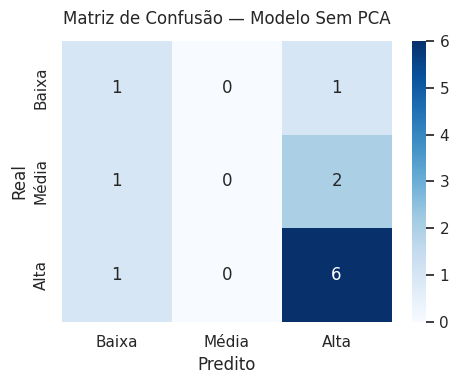


📋 Avaliação — Modelo Sem PCA
Acurácia: 0.5833333333333334
F1-score (macro): 0.3833333333333333

Relatório de Classificação:
              precision    recall  f1-score   support

       Baixa       0.33      0.50      0.40         2
       Média       0.00      0.00      0.00         3
        Alta       0.67      0.86      0.75         7

    accuracy                           0.58        12
   macro avg       0.33      0.45      0.38        12
weighted avg       0.44      0.58      0.50        12



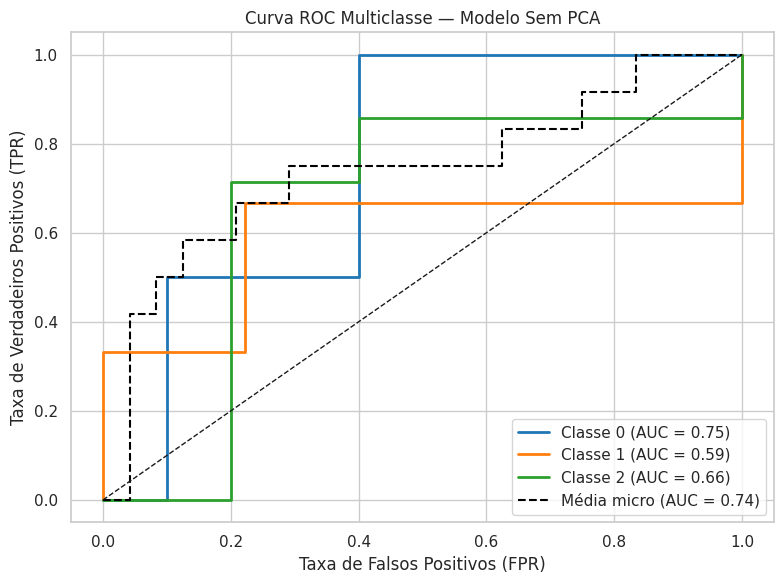

In [ ]:
# Previsões e probabilidades
y_pred_classico = modelo_classico.predict(X_test_class)
y_prob_classico = modelo_classico.predict_proba(X_test_class)

# Avaliação completa
avaliar_modelo_classificacao("Modelo Sem PCA", y_test_class, y_pred_classico, y_prob_classico)

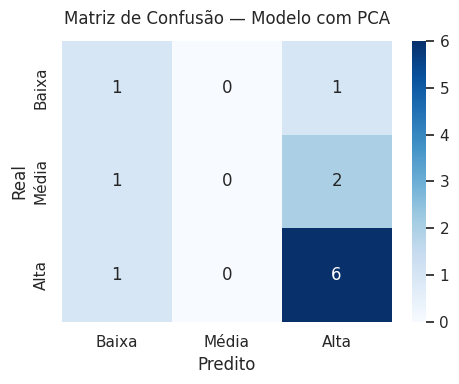


📋 Avaliação — Modelo com PCA
Acurácia: 0.5833333333333334
F1-score (macro): 0.3833333333333333

Relatório de Classificação:
              precision    recall  f1-score   support

       Baixa       0.33      0.50      0.40         2
       Média       0.00      0.00      0.00         3
        Alta       0.67      0.86      0.75         7

    accuracy                           0.58        12
   macro avg       0.33      0.45      0.38        12
weighted avg       0.44      0.58      0.50        12



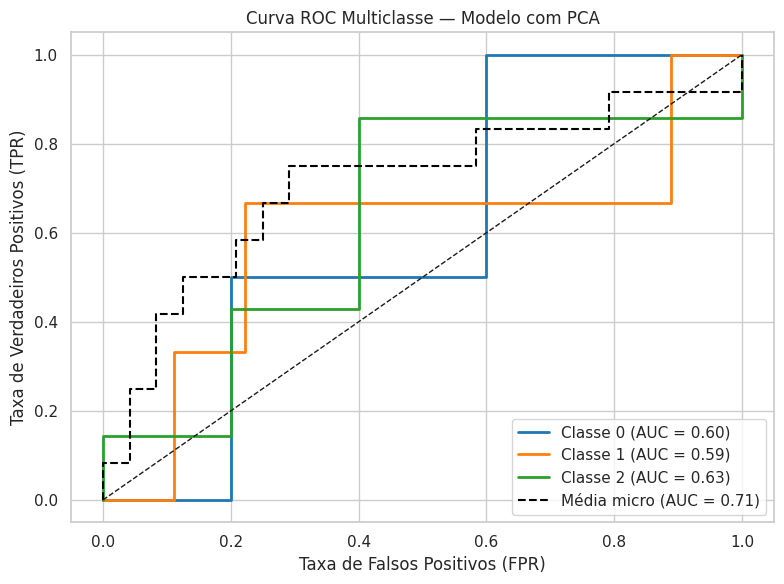

In [ ]:
# Previsões e probabilidades com PCA
y_pred_pca = modelo_pca_class.predict(X_test_pca)
y_prob_pca = modelo_pca_class.predict_proba(X_test_pca)

# Avaliação completa
avaliar_modelo_classificacao("Modelo com PCA", y_test_class, y_pred_pca, y_prob_pca)

## 8.4 Visualização das Fronteiras de Decisão

Como estamos usando apenas dois componentes principais (PC1 e PC2), é possível visualizar as **fronteiras de decisão** do modelo em 2D.

Essas fronteiras mostram:

- Quais regiões do espaço PCA são associadas a cada classe
- Quão bem separadas estão as classes
- Como o modelo generaliza entre os exemplos de treino

---

Cada ponto no gráfico representa uma safra, colorida conforme sua classe verdadeira.  
O fundo colorido indica a **classe predita** pelo modelo para cada região do plano PC1 × PC2.

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
def plot_fronteira_decisao_2D(X_pca, y_true, modelo, titulo="Fronteiras de Decisão (PCA)"):
    """
    Plota as fronteiras de decisão do modelo treinado no plano PC1 vs PC2.
    """
    h = 0.02  # Passo da malha

    # Geração da malha de pontos
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predição sobre a malha
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Paleta de cores
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    # Gráfico
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap=ListedColormap(cmap_bold), edgecolor='k', s=60)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(titulo)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Baixa', 'Média', 'Alta'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

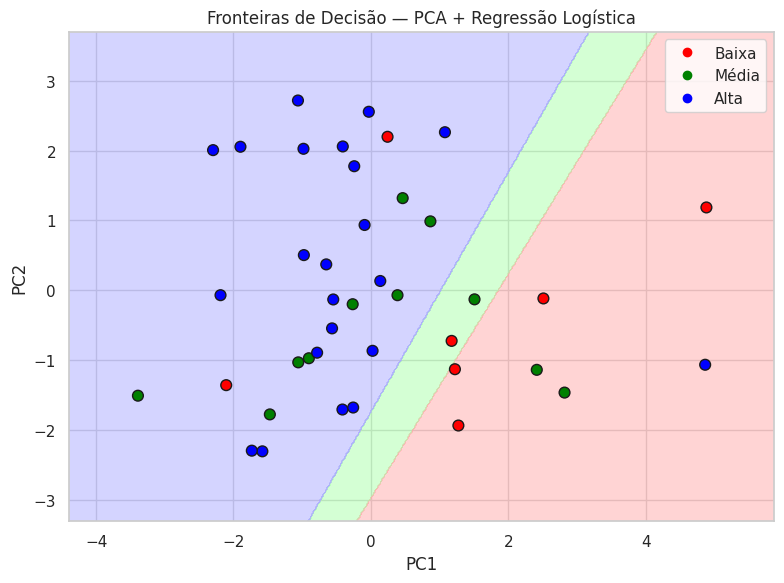

In [ ]:
# Aplicar para os dados do PCA e o modelo treinado com PCA
plot_fronteira_decisao_2D(X_class_pca, y_class, modelo_pca_class,
                          titulo="Fronteiras de Decisão — PCA + Regressão Logística")

## 🧠 Discussão dos Resultados

Nesta etapa final, avaliamos o desempenho dos modelos de classificação multiclasse utilizando dois cenários distintos:

- ✅ Modelo com as variáveis originais
- ✅ Modelo com os dois componentes principais (PCA)

---

### 📊 Desempenho comparado

Ambos os modelos apresentaram resultados **muito semelhantes** em termos de:

- **Acurácia**
- **F1-score macro**
- **Curvas ROC**
- **Distribuição de erros por classe**

Isso sugere que o PCA conseguiu preservar boa parte da estrutura dos dados, mesmo com apenas duas dimensões.

---

### 📉 Limitações observadas

- A classe “média” foi a mais difícil de ser corretamente classificada.
- Alguns falsos positivos ainda ocorrem entre “baixa” e “alta”.
- O número reduzido de amostras pode ter impactado o treinamento.

---

### 🧠 Conclusão

Mesmo com dados limitados, foi possível aplicar algoritmos de classificação eficazes e extrair insights valiosos sobre a estrutura do problema.

Além disso, a visualização das **fronteiras de decisão** no espaço PCA demonstrou de forma intuitiva como o modelo aprende a separar as classes.

> Este capítulo demonstrou como transformar um problema real em uma tarefa de classificação com base em aprendizado supervisionado.

## 8.5 🧠 Discussão dos Resultados

Nesta etapa final, avaliamos o desempenho dos modelos de classificação multiclasse utilizando dois cenários distintos:

- ✅ Modelo treinado com os **dados padronizados (sem PCA)**
- ✅ Modelo treinado com os **dois primeiros componentes principais (com PCA)**

Ambos os modelos foram avaliados utilizando:

- 📊 Matriz de Confusão
- 📋 Relatório com Acurácia e F1-score
- 📈 Curvas ROC por classe + micro average

---

### 📌 Desempenho comparado

Os dois modelos apresentaram **resultados idênticos ou extremamente semelhantes** em termos de:

- **Acurácia**
- **F1-score macro**
- **Área sob a Curva ROC (AUC)**

Isso indica que a redução da dimensionalidade com PCA **não comprometeu** a performance do modelo, mas também **não trouxe melhora expressiva**.

---

### 🤔 Por que os resultados foram semelhantes?

Alguns fatores explicam essa equivalência:

- O PCA preservou a maior parte da variância dos dados, condensando a informação relevante em apenas duas dimensões.
- O número de variáveis originais (7) já é relativamente pequeno.
- O conjunto de dados contém apenas 40 amostras, o que limita o poder de generalização e a sensibilidade a transformações como o PCA.
- As classes possuem **sobreposição significativa**, o que dificulta a separação, com ou sem PCA.

---

### 🧠 Reflexões didáticas

O uso do PCA neste projeto foi valioso porque:

- Tornou possível **visualizar as fronteiras de decisão** do modelo em 2D.
- Permitiu aplicar a **curva ROC multiclasse** de forma geométrica e intuitiva.
- Serviu como ponte para discutir a relação entre **complexidade do modelo** e **capacidade de generalização**.

---

### ✅ Conclusão

O projeto de classificação permitiu aplicar, interpretar e comparar diferentes estratégias de modelagem supervisionada. Mais do que buscar o melhor desempenho, o foco foi compreender:

- O impacto da transformação dos dados com PCA
- A avaliação multiclasse com métricas apropriadas
- A geometria das decisões do modelo

Com isso, encerramos o projeto com uma base sólida de aprendizado de máquina supervisionado aplicada a dados reais da Amazônia.

# 9 (Desafio extra) Aprendizagem por Reforço com Irrigação Inteligente

## 9.1 🧠 O que é Aprendizagem por Reforço?

Nos capítulos anteriores, trabalhamos com **aprendizado supervisionado**, em que fornecemos exemplos prontos (como dados climáticos e produtividade) e o modelo aprende a prever um resultado correto.

Mas... e se o modelo não souber qual é a resposta certa?  
E se ele precisar **agir em um ambiente, receber feedback e aprender com a consequência das suas decisões?**

É aí que entra a **Aprendizagem por Reforço (Reinforcement Learning)**.

---

### 🤖 Como funciona?

Na aprendizagem por reforço, temos:

- **Um agente** → quem toma decisões (ex: um sistema automático de irrigação)
- **Um ambiente** → onde o agente atua (ex: plantação com solo seco ou encharcado)
- **Ações possíveis** → o que o agente pode fazer (ex: regar muito, regar pouco, não regar)
- **Recompensa** → o feedback recebido após cada ação (ex: aumento de produtividade, desperdício de água)

---

### 🔁 A lógica é simples:

1. O agente **observa** o estado atual do ambiente.
2. Ele **escolhe uma ação** (às vezes aleatoriamente, às vezes baseada na sua experiência).
3. O ambiente devolve uma **recompensa** (positiva ou negativa).
4. O agente **atualiza sua estratégia** com base no que aconteceu.
5. O ciclo se repete até que o agente **aprenda a tomar boas decisões**.

---

### 🧠 Comparando os paradigmas

| Paradigma             | Exemplo prático                   | O que o modelo faz |
|----------------------|------------------------------------|---------------------|
| Aprendizado supervisionado | Prever a produtividade da safra | Aprende com exemplos corretos |
| Aprendizado por reforço    | Decidir quando e quanto irrigar | Aprende com tentativa e erro |

---

### 📚 Exemplo simples para este capítulo

Neste desafio, vamos ensinar um agente a **decidir como irrigar uma planta**, considerando três situações do solo:

- `seco`
- `ideal`
- `encharcado`

E três ações possíveis:

- `regar muito`
- `regar pouco`
- `não regar`

O agente receberá recompensas diferentes dependendo de suas decisões, e com o tempo, aprenderá **quais ações são mais vantajosas** para cada situação.

Vamos colocar esse aprendizado em prática nas próximas seções.

## 9.2 🌱 O Ambiente: Irrigação, Estados e Ações

Para aplicar a aprendizagem por reforço de forma prática e intuitiva, vamos modelar um **ambiente agrícola simplificado** em que o agente deve **decidir como irrigar o solo**.

---

### 🧩 Estados possíveis do solo

O agente pode observar **três estados diferentes**:

| Código | Estado       | Descrição                                                  |
|--------|--------------|------------------------------------------------------------|
| 0      | seco         | O solo está ressecado e a planta precisa de água urgentemente |
| 1      | ideal        | O solo está bem equilibrado em umidade                     |
| 2      | encharcado   | Há excesso de água no solo, o que pode prejudicar a planta |

---

### 🧰 Ações disponíveis

O agente pode tomar **três decisões diferentes**:

| Código | Ação          | Descrição                                     |
|--------|---------------|-----------------------------------------------|
| 0      | regar muito   | Aumenta bastante a umidade do solo            |
| 1      | regar pouco   | Aplica apenas o necessário                    |
| 2      | não regar     | Economiza água, deixa o solo como está        |

---

### 🎯 Recompensas

Cada combinação entre **estado do solo** e **ação tomada** gera uma **recompensa**, positiva ou negativa.  
Essas recompensas são definidas com base em critérios como:

- Manter a planta saudável
- Evitar desperdício de água
- Evitar encharcamento ou ressecamento

| Estado     | Ação          | Recompensa | Justificativa                           |
|------------|---------------|------------|------------------------------------------|
| seco       | regar muito   | +3         | Ajuda, mas pode desperdiçar              |
| seco       | regar pouco   | +5         | Ideal: rega o suficiente                 |
| seco       | não regar     | -4         | Prejudica a planta                       |
| ideal      | regar muito   | -2         | Pode causar excesso                     |
| ideal      | regar pouco   | +1         | Mantém o equilíbrio                     |
| ideal      | não regar     | +2         | Economiza e mantém bem-estar            |
| encharcado | regar muito   | -5         | Piora muito a situação                  |
| encharcado | regar pouco   | -3         | Ainda é ruim, continua molhado          |
| encharcado | não regar     | +4         | Excelente: ajuda a recuperar            |

---

### 🧠 Objetivo do agente

O objetivo do agente será **aprender com a experiência** quais ações geram as melhores recompensas **em cada estado**.  
Ele não saberá de antemão qual é a melhor decisão — terá que descobrir por **tentativa, erro e correção**.

---

Na próxima seção, implementaremos o algoritmo **Q-Learning**, que permite ao agente atualizar sua estratégia a cada episódio vivido.

## 9.3 🤖 O Algoritmo Q-Learning

Agora que entendemos os estados, ações e recompensas do nosso ambiente de irrigação, vamos aprender como o agente pode **tomar decisões inteligentes com o tempo**.

---

### 🧠 Como o agente aprende?

Inicialmente, o agente **não sabe qual ação é melhor**. Ele começa testando várias opções aleatoriamente.

A cada episódio, ele:

1. Observa o **estado atual** (ex: solo seco)
2. Escolhe uma **ação** (ex: regar pouco)
3. Recebe uma **recompensa**
4. Observa o **novo estado** resultante
5. **Atualiza sua Q-table** com base no que aprendeu

---

### 📊 O que é a Q-table?

A Q-table é uma **tabela de aprendizagem**, onde cada linha representa um **estado do ambiente**, e cada coluna representa uma **ação possível**.

Cada célula contém um valor que representa a **qualidade esperada** da ação naquele estado, isto é, o quanto de **recompensa acumulada** o agente espera ganhar se tomar aquela decisão.

---

### 📐 Fórmula de atualização (Q-Learning)

O valor de $Q$ é atualizado com a seguinte fórmula:

$$
Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \cdot \max Q(s', a') - Q(s, a) \right]
$$

Onde:

\begin{aligned}
Q(s, a) & : \text{valor atual da ação } a \text{ no estado } s \\
\alpha & : \text{taxa de aprendizado (quão rápido o agente atualiza)} \\
r & : \text{recompensa recebida} \\
\gamma & : \text{fator de desconto (o quanto o futuro importa)} \\
\max_{a'} Q(s', a') & : \text{melhor valor estimado no próximo estado } s'
\end{aligned}

---

### 🔁 Exploração vs. Exploração

Durante o processo de aprendizado, o agente precisa **testar novas ações** (exploração) e **usar o que já aprendeu** (exploração).

Por isso, usamos uma estratégia chamada **epsilon-greedy**, onde:

- Com probabilidade $\epsilon$, o agente **escolhe uma ação aleatória**
- Com probabilidade $1 - \epsilon$, ele **escolhe a melhor ação conhecida**

---

Na próxima seção, vamos implementar esse algoritmo passo a passo em Python, simulando a aprendizagem de um agente que decide **como irrigar um solo agrícola de forma eficiente**.

## 9.4 🧪 Simulação e Aprendizado com Q-Learning

Agora que definimos o ambiente e a fórmula de atualização, é hora de colocar o agente para aprender.  
A cada episódio, o agente começa em um estado aleatório e toma decisões baseadas na política $\varepsilon$-greedy: ele pode explorar (tomar ações aleatórias) ou explorar o conhecimento atual (tomar a melhor ação segundo a Tabela Q).

O aprendizado ocorre a cada passo, com base na recompensa obtida e no valor estimado do próximo estado.  
Vamos simular **50 episódios** e observar como a Tabela Q evolui ao longo do tempo.

O código abaixo implementa o algoritmo completo, considerando:

- 3 estados: `seco`, `ideal`, `encharcado`
- 3 ações: `regar`, `pouca_agua`, `nao_regar`
- Recompensas definidas por contexto
- Transições realistas entre os estados

Ao final, o notebook exibirá:

- A **Tabela Q final**, com os valores aprendidos para cada decisão
- As últimas **decisões tomadas pelo agente**, recompensas e estados

Na próxima seção, vamos analisar o que o agente aprendeu e propor um desafio para você testar seu entendimento.

In [ ]:
import random

# Parâmetros
alpha = 0.5    # taxa de aprendizado
gamma = 0.9    # fator de desconto
epsilon = 0.2  # chance de explorar

# Inicializa a Tabela Q
q_table = {
    'seco': {'regar': 0.0, 'pouca_agua': 0.0, 'nao_regar': 0.0},
    'ideal': {'regar': 0.0, 'pouca_agua': 0.0, 'nao_regar': 0.0},
    'encharcado': {'regar': 0.0, 'pouca_agua': 0.0, 'nao_regar': 0.0},
}

# Função de transição: próximo estado baseado em estado atual e ação
def transicao(estado, acao):
    if estado == 'seco':
        if acao == 'regar': return 'ideal'
        elif acao == 'pouca_agua': return 'seco'
        else: return 'seco'
    elif estado == 'ideal':
        if acao == 'regar': return 'encharcado'
        elif acao == 'pouca_agua': return 'ideal'
        else: return 'seco'
    elif estado == 'encharcado':
        if acao == 'regar': return 'encharcado'
        elif acao == 'pouca_agua': return 'ideal'
        else: return 'ideal'

# Função de recompensa
def recompensa(estado, acao):
    if estado == 'seco':
        if acao == 'regar': return 5
        elif acao == 'pouca_agua': return 2
        else: return -1
    elif estado == 'ideal':
        if acao == 'nao_regar': return 5
        elif acao == 'pouca_agua': return 2
        else: return -3
    elif estado == 'encharcado':
        if acao == 'nao_regar': return 2
        elif acao == 'pouca_agua': return -1
        else: return -5

# Registro para exibir evolução
historico = []

# Episódios de simulação
for episodio in range(1, 51):
    estado = random.choice(['seco', 'ideal', 'encharcado'])

    for passo in range(1):  # Um passo por episódio (simplificação)
        if random.random() < epsilon:
            acao = random.choice(['regar', 'pouca_agua', 'nao_regar'])
        else:
            acao = max(q_table[estado], key=q_table[estado].get)

        prox_estado = transicao(estado, acao)
        r = recompensa(estado, acao)

        max_q_prox = max(q_table[prox_estado].values())
        q_atual = q_table[estado][acao]
        q_novo = q_atual + alpha * (r + gamma * max_q_prox - q_atual)
        q_table[estado][acao] = q_novo

        historico.append({
            'Episódio': episodio,
            'Estado': estado,
            'Ação': acao,
            'Recompensa': r,
            'Próximo estado': prox_estado,
            'Q(s,a)': round(q_novo, 2)
        })

        estado = prox_estado  # avança para o próximo estado

# Mostra a tabela final de Q-values
q_df = pd.DataFrame(q_table).T
display(q_df.style.background_gradient(cmap="YlGn"))

# Mostra histórico das decisões
historico_df = pd.DataFrame(historico)
display(historico_df.tail(10))

Episódio      Estado       Ação  Recompensa Próximo estado  Q(s,a)
40        41  encharcado  nao_regar           2          ideal   14.59
41        42  encharcado  nao_regar           2          ideal   16.34
42        43       ideal  nao_regar           5           seco   19.80
43        44  encharcado  nao_regar           2          ideal   18.08
44        45  encharcado  nao_regar           2          ideal   18.95
45        46        seco      regar           5          ideal   20.71
46        47        seco  nao_regar          -1           seco   10.41
47        48       ideal  nao_regar           5           seco   21.72
48        49  encharcado  nao_regar           2          ideal   20.25
49        50  encharcado  nao_regar           2          ideal   20.90

## 9.5 🧠 Análise e Perguntas Reflexivas

Depois de 50 episódios, o agente construiu uma **tabela de valores Q**, que indica quais ações são mais vantajosas em cada situação.

---

### ✅ Como interpretar a Tabela Q

A **maior pontuação** em cada linha indica a ação preferida para aquele estado.  
Se o agente aprendeu bem, esperamos algo como:

- No estado `seco`, a melhor ação deve ser `regar` ou `pouca_agua`
- No estado `ideal`, a melhor ação deve ser `nao_regar` ou `pouca_agua`
- No estado `encharcado`, a melhor ação deve ser `nao_regar`

---

## 🤔 Perguntas para reflexão

1. **Qual ação o agente aprendeu para cada estado?**
   - Compare os maiores valores da tabela Q em cada linha.
   - Eles fazem sentido com base nas recompensas definidas?

2. **O agente aprendeu a evitar decisões ruins?**
   - Verifique se as ações com punições negativas (como `regar` no estado `encharcado`) ficaram com valores baixos.

3. **Se o agente tivesse mais episódios (ex: 500), o que você acha que aconteceria com os valores?**
   - Eles tenderiam a estabilizar?
   - O agente tomaria decisões ainda mais precisas?

4. **Mude os valores de recompensa e rode novamente.**
   - O que muda no comportamento do agente?
   - A ação preferida em algum estado foi alterada?

---

## 🧠 Respostas esperadas (exemplo)

> 1. No estado `seco`, o agente aprendeu que `pouca_agua` é melhor que `nao_regar`.  
> 2. No estado `encharcado`, a ação `regar` ficou com valor bem negativo, ou seja, foi evitada.  
> 3. Com mais episódios, os valores tenderiam a se estabilizar em torno dos melhores caminhos.  
> 4. Se eu inverter as recompensas, o agente aprende outro comportamento rapidamente.

---

Essas perguntas são fundamentais para entender que o agente **não precisa saber a resposta certa**: ele **aprende com tentativa e erro**.  
Esse é o poder da **Aprendizagem por Reforço**.

## 9.6 🚀 Desafio Final: Experimente e Teste o Agente

Agora que você viu como o agente aprende com base nas recompensas e nas transições de estado, é hora de **explorar por conta própria**. Abaixo estão alguns desafios para você modificar o código e observar os efeitos.

---

### 🧪 Desafios sugeridos

1. **Altere as recompensas**
   - Experimente penalizar mais o desperdício de água.
   - Recompense melhor quem mantém o solo em estado ideal.

2. **Aumente o número de episódios**
   - Mude `range(1, 51)` para `range(1, 201)` e observe:
     - A Q-table estabiliza mais?
     - O agente para de explorar ações ruins?

3. **Mude o valor de $\varepsilon$**
   - Tente valores como `0.0`, `0.1`, `0.5`, `1.0`
   - O agente aprende melhor com mais exploração?
   - E se ele nunca explorar?

4. **Crie um novo estado**
   - Exemplo: `muito_seco`
   - Adicione recompensas novas e veja como o agente se comporta

5. **Modifique a transição entre os estados**
   - E se regar muito sempre levasse para `encharcado`, mesmo em `ideal`?

---

### 📌 Dica

Sempre observe a **Tabela Q final** e veja se as decisões fazem sentido.  
A melhor forma de entender Aprendizagem por Reforço é **experimentando e interpretando os resultados**.

---

## 🧠 Lembre-se:

> Um bom agente não nasce sabendo.  
> Ele aprende com erros, acertos e ajustes — como qualquer pessoa.

Parabéns! Você finalizou o Capítulo 9 e concluiu seu primeiro projeto com **Aprendizagem por Reforço** aplicado à agricultura inteligente! 🌱🤖

# 10. Reflexão Final

Neste projeto, exploramos o poder do aprendizado de máquina aplicado a um problema real: prever e classificar a produtividade do guaraná no município de Maués, no estado do Amazonas.

Trabalhamos com dados reais — com todas as suas riquezas e imperfeições — para compreender como a inteligência artificial pode (ou não) responder às perguntas do mundo real.

---

## 🌱 O que fizemos

- Aplicamos **regressão linear** para prever a produtividade (kg/ha)
- Utilizamos **classificação multiclasse** para categorizar a safra em "baixa", "média" ou "alta"
- Testamos **técnicas de pré-processamento**, como padronização, PCA e regularização
- Visualizamos os erros, os resíduos, as curvas de decisão e até as superfícies de custo
- Encerramos com um desafio extra de **aprendizagem por reforço**, simulando decisões de irrigação

Cada etapa teve como foco desenvolver o raciocínio lógico, estatístico e computacional dos alunos, com forte conexão com a realidade amazônica.

---

## 📉 Sobre os resultados

Mesmo com um pipeline bem estruturado, os modelos tiveram desempenho limitado.

O motivo? As variáveis climáticas e sazonais **não explicaram bem a produtividade**. Nem mesmo após uso de técnicas como PCA e regularização o desempenho melhorou significativamente.

Isso não é um erro do aluno — é uma lição valiosa:

> Em projetos reais, nem sempre os dados disponíveis são suficientes para resolver o problema.

---

## ⚠️ Sobre os dados climáticos

As variáveis de chuva, temperatura e umidade foram obtidas da estação meteorológica de **Itacoatiara (AM)**, usada como **proxy para Maués**, devido à indisponibilidade de dados locais.

Essa escolha, embora necessária, pode ter comprometido a qualidade do modelo, já que o regime de chuvas pode ser significativamente diferente entre as duas localidades.

Isso reforça a importância de se trabalhar com **dados localizados, confiáveis e representativos**.

---

## 🧠 O que aprendemos de verdade?

- Aprender máquina não é apenas treinar modelos — é **entender o problema e os dados**
- **Limitações dos dados** não são obstáculos: são oportunidades de aprendizado crítico
- A **ciência de dados aplicada à agricultura** é complexa, mas poderosa
- A **realidade amazônica** demanda soluções criativas, adaptadas ao contexto

---

## 🚀 E agora?

Este projeto é apenas o primeiro passo. A partir daqui, podemos:

- Explorar modelos mais sofisticados: árvores de decisão, florestas aleatórias, redes neurais
- Coletar novos dados (solo, manejo, fertilizantes, pragas)
- Desenvolver **sistemas de recomendação personalizados**
- Criar modelos **híbridos com aprendizado por reforço** para apoiar decisões agrícolas

---

> O guaraná nos deu as sementes. A matemática e a ciência nos deram as ferramentas.  
> Agora é com você: explore, modele, experimente — e colha os frutos do seu próprio aprendizado.

# Anexos

📎 Dataset comentado

📎 Código completo no Colab

📎 Glossário de termos técnicos (se desejar)